In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import os
import re
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1.0 Receipts data set

In [2]:
Receipts = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\IBM Datasets\\receipts.csv")
Receipts.head()

ID transaction_date transaction_time  sales_outlet_id  staff_id  \
0   1       27/04/2022         09:53:55                8        42   
1   1       27/04/2022         09:53:55                8        42   
2   2       27/04/2022         08:00:34                8        42   
3   3       27/04/2022         09:04:58                8        42   
4   4       27/04/2022         08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
0            0            0      1             0          38         2   
1            0            0      1             0          84         1   
2            0            0      2             0          51         2   
3            0            1      3             0          33         1   
4         8232            1      4             0          27         1   

   line_item_amount  unit_price  promo_item_y/n  
0               7.5        3.75               0  
1               0.8        0.80               0  
2               6.0        3.00               0  
3               3.5        3.50               0  
4               3.5        3.50               0

## 1.1. EDA

In [3]:
Receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105722 entries, 0 to 105721
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                105722 non-null  int64  
 1   transaction_date  105722 non-null  object 
 2   transaction_time  105722 non-null  object 
 3   sales_outlet_id   105722 non-null  int64  
 4   staff_id          105722 non-null  int64  
 5   customer_id       105722 non-null  int64  
 6   instore_y/n       105722 non-null  int64  
 7   order             105722 non-null  int64  
 8   line_item_id      105722 non-null  int64  
 9   product_id        105722 non-null  int64  
 10  quantity          105722 non-null  int64  
 11  line_item_amount  105722 non-null  float64
 12  unit_price        105722 non-null  float64
 13  promo_item_y/n    105722 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 11.3+ MB


In [4]:
# Convert 'transaction_time' to datetime format
Receipts['transaction_time'] = pd.to_datetime(Receipts['transaction_time'], format='%H:%M:%S')

# Extract the hour and create a new column 'hour'
Receipts['Hours'] = Receipts['transaction_time'].dt.hour

In [5]:
# Count duplicates
duplicate_count = Receipts.duplicated().sum()

# Print one duplicate entry
if duplicate_count > 0:
    duplicate_entry = Receipts[Receipts.duplicated()].head(1)
    print(f"Duplicate Count: {duplicate_count}")
else:
    print("No duplicates found.")

Duplicate Count: 709


In [6]:
# Find and print the row numbers of the first instance and its duplicate
duplicates = Receipts[Receipts.duplicated(keep=False)]

if not duplicates.empty:
    first_instance_row = duplicates.index[0]
    duplicate_row = duplicates.index[1]
    
    print(f"Row numbers of the first instance and its duplicate:")
    print(f"First Instance Row Number: {first_instance_row}")
    print(f"Duplicate Row Number: {duplicate_row}")
else:
    print("No duplicates found.")

Row numbers of the first instance and its duplicate:
First Instance Row Number: 138
Duplicate Row Number: 139


In [7]:
rows_138_139 = Receipts.loc[[138, 139]]

# Display the result similar to .head()
print("Rows with indices 138 and 139:")
print(rows_138_139)

Rows with indices 138 and 139:
      ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
138  117       27/04/2022 1900-01-01 09:06:24                8        45   
139  117       27/04/2022 1900-01-01 09:06:24                8        45   

     customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
138            0            0    117             0          71         1   
139            0            0    117             0          71         1   

     line_item_amount  unit_price  promo_item_y/n  Hours  
138              3.75        3.75               0      9  
139              3.75        3.75               0      9  


In [8]:
# Drop duplicates and reset indexes
Receipts = Receipts.drop_duplicates(keep='first').reset_index(drop=True)

In [9]:
Receipts.shape

(105013, 15)

In [10]:
# Confirming duplicates removal
rows_138_139 = Receipts.loc[[138, 139]]

# Display the result similar to .head()
print("Rows with indices 138 and 139:")
print(rows_138_139)

Rows with indices 138 and 139:
      ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
138  117       27/04/2022 1900-01-01 09:06:24                8        45   
139  118       27/04/2022 1900-01-01 09:49:35                8        45   

     customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
138            0            0    117             0          71         1   
139            0            1    118             0          71         1   

     line_item_amount  unit_price  promo_item_y/n  Hours  
138              3.75        3.75               0      9  
139              3.75        3.75               0      9  


In [11]:
Receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105013 entries, 0 to 105012
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                105013 non-null  int64         
 1   transaction_date  105013 non-null  object        
 2   transaction_time  105013 non-null  datetime64[ns]
 3   sales_outlet_id   105013 non-null  int64         
 4   staff_id          105013 non-null  int64         
 5   customer_id       105013 non-null  int64         
 6   instore_y/n       105013 non-null  int64         
 7   order             105013 non-null  int64         
 8   line_item_id      105013 non-null  int64         
 9   product_id        105013 non-null  int64         
 10  quantity          105013 non-null  int64         
 11  line_item_amount  105013 non-null  float64       
 12  unit_price        105013 non-null  float64       
 13  promo_item_y/n    105013 non-null  int64         
 14  Hour

In [12]:
# Select only non-object columns
numeric_columns = [col for col in Receipts.select_dtypes(exclude='object').columns if col != 'transaction_time']
print(Receipts[numeric_columns].dtypes)

Receipts[numeric_columns].describe()

ID                    int64
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_y/n           int64
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_y/n        int64
Hours                 int64
dtype: object


ID  sales_outlet_id       staff_id    customer_id  \
count  105013.000000    105013.000000  105013.000000  105013.000000   
mean    42265.864607         5.335958      22.332825    2365.463714   
std     24569.829114         2.061775      11.811414    3003.836624   
min         1.000000         3.000000       6.000000       0.000000   
25%     21131.000000         3.000000      12.000000       0.000000   
50%     41584.000000         5.000000      19.000000       0.000000   
75%     63545.000000         8.000000      32.000000    5176.000000   
max     85585.000000         8.000000      45.000000    8501.000000   

         instore_y/n          order  line_item_id     product_id  \
count  105013.000000  105013.000000      105013.0  105013.000000   
mean        0.502005   42265.864607           0.0      49.331511   
std         0.499998   24569.829114           0.0      18.052312   
min         0.000000       1.000000           0.0       1.000000   
25%         0.000000   21131.000000           0.0      34.000000   
50%         1.000000   41584.000000           0.0      48.000000   
75%         1.000000   63545.000000           0.0      61.000000   
max         1.000000   85585.000000           0.0      87.000000   

            quantity  line_item_amount     unit_price  promo_item_y/n  \
count  105013.000000     105013.000000  105013.000000   105013.000000   
mean        1.210422          3.946398       3.316201        0.012475   
std         0.435070          3.285791       2.041527        0.110992   
min         1.000000          0.800000       0.800000        0.000000   
25%         1.000000          3.000000       2.500000        0.000000   
50%         1.000000          3.250000       3.000000        0.000000   
75%         1.000000          4.400000       3.750000        0.000000   
max         8.000000        360.000000      45.000000        1.000000   

               Hours  
count  105013.000000  
mean       12.290878  
std         3.895173  
min         1.000000  
25%         9.000000  
50%        12.000000  
75%        16.000000  
max        21.000000

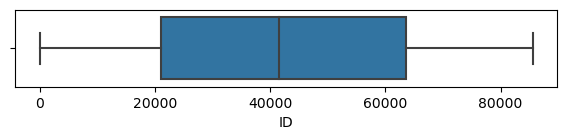

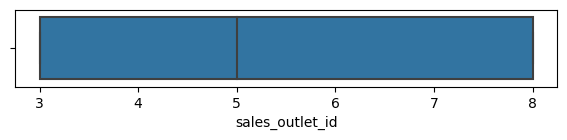

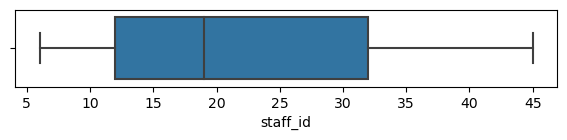

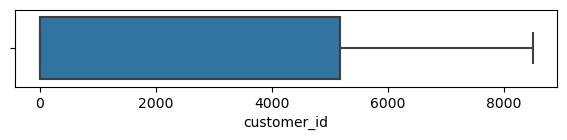

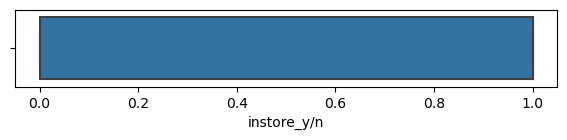

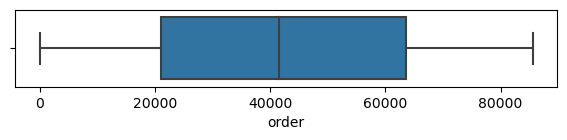

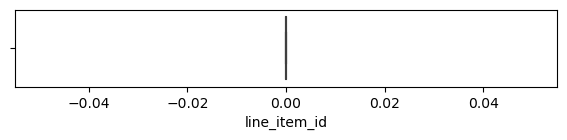

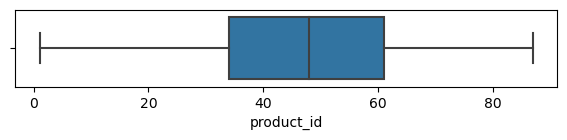

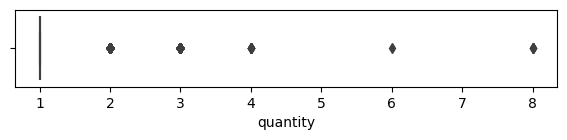

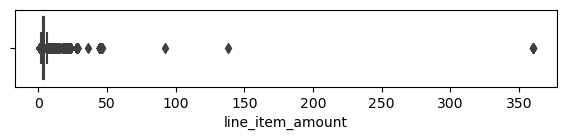

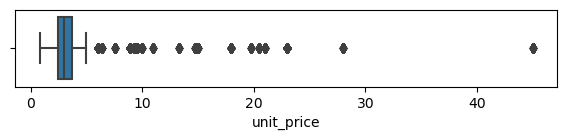

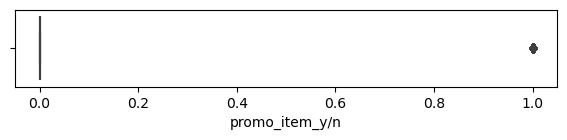

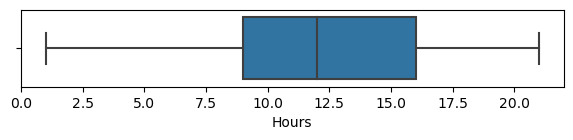

In [13]:
for column in Receipts[numeric_columns]:
        plt.figure(figsize=(7,1))
        sns.boxplot(data=Receipts[numeric_columns], x=column)

## 1.2. Investigate the outliers

In [14]:
# Quantity
outliers_quantity_count = Receipts[Receipts['quantity'] >= 6].shape[0]
print("Number of rows where quantity >= 6:", outliers_quantity_count)

Number of rows where quantity >= 6: 5


In [15]:
# Line_item_amount
outliers_line_count = Receipts[Receipts['line_item_amount'] >= 150].shape[0]
print("Number of rows where 'line_item_amount' >= 150:", outliers_line_count)

Number of rows where 'line_item_amount' >= 150: 4


In [16]:
outliers_quantity = Receipts[Receipts['quantity'] >= 6]
outliers_quantity

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
17399  14517       09/04/2022 1900-01-01 09:04:04                5        25   
32109  25416       17/04/2022 1900-01-01 11:18:31                8         6   
32123  25424       17/04/2022 1900-01-01 10:41:11                8        44   
32391  25590       17/04/2022 1900-01-01 09:05:20                8        42   
32477  25666       17/04/2022 1900-01-01 09:55:47                8        42   

       customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
17399            0            0  14517             0          82         6   
32109            0            1  25416             0           8         8   
32123            0            1  25424             0           8         8   
32391         8311            1  25590             0           8         8   
32477            0            0  25666             0           8         8   

       line_item_amount  unit_price  promo_item_y/n  Hours  
17399             138.0        23.0               0      9  
32109             360.0        45.0               0     11  
32123             360.0        45.0               0     10  
32391             360.0        45.0               0      9  
32477             360.0        45.0               0      9

In [17]:
Receipts = Receipts[Receipts['quantity'] < 6]

In [18]:
# check outliers from other colum

line_item_quantity_count = Receipts[Receipts['line_item_amount'] >= 100].shape[0]
print("Number of rows where line_items >= 100:", line_item_quantity_count)

Number of rows where line_items >= 100: 0


## 1.3. Visualisation

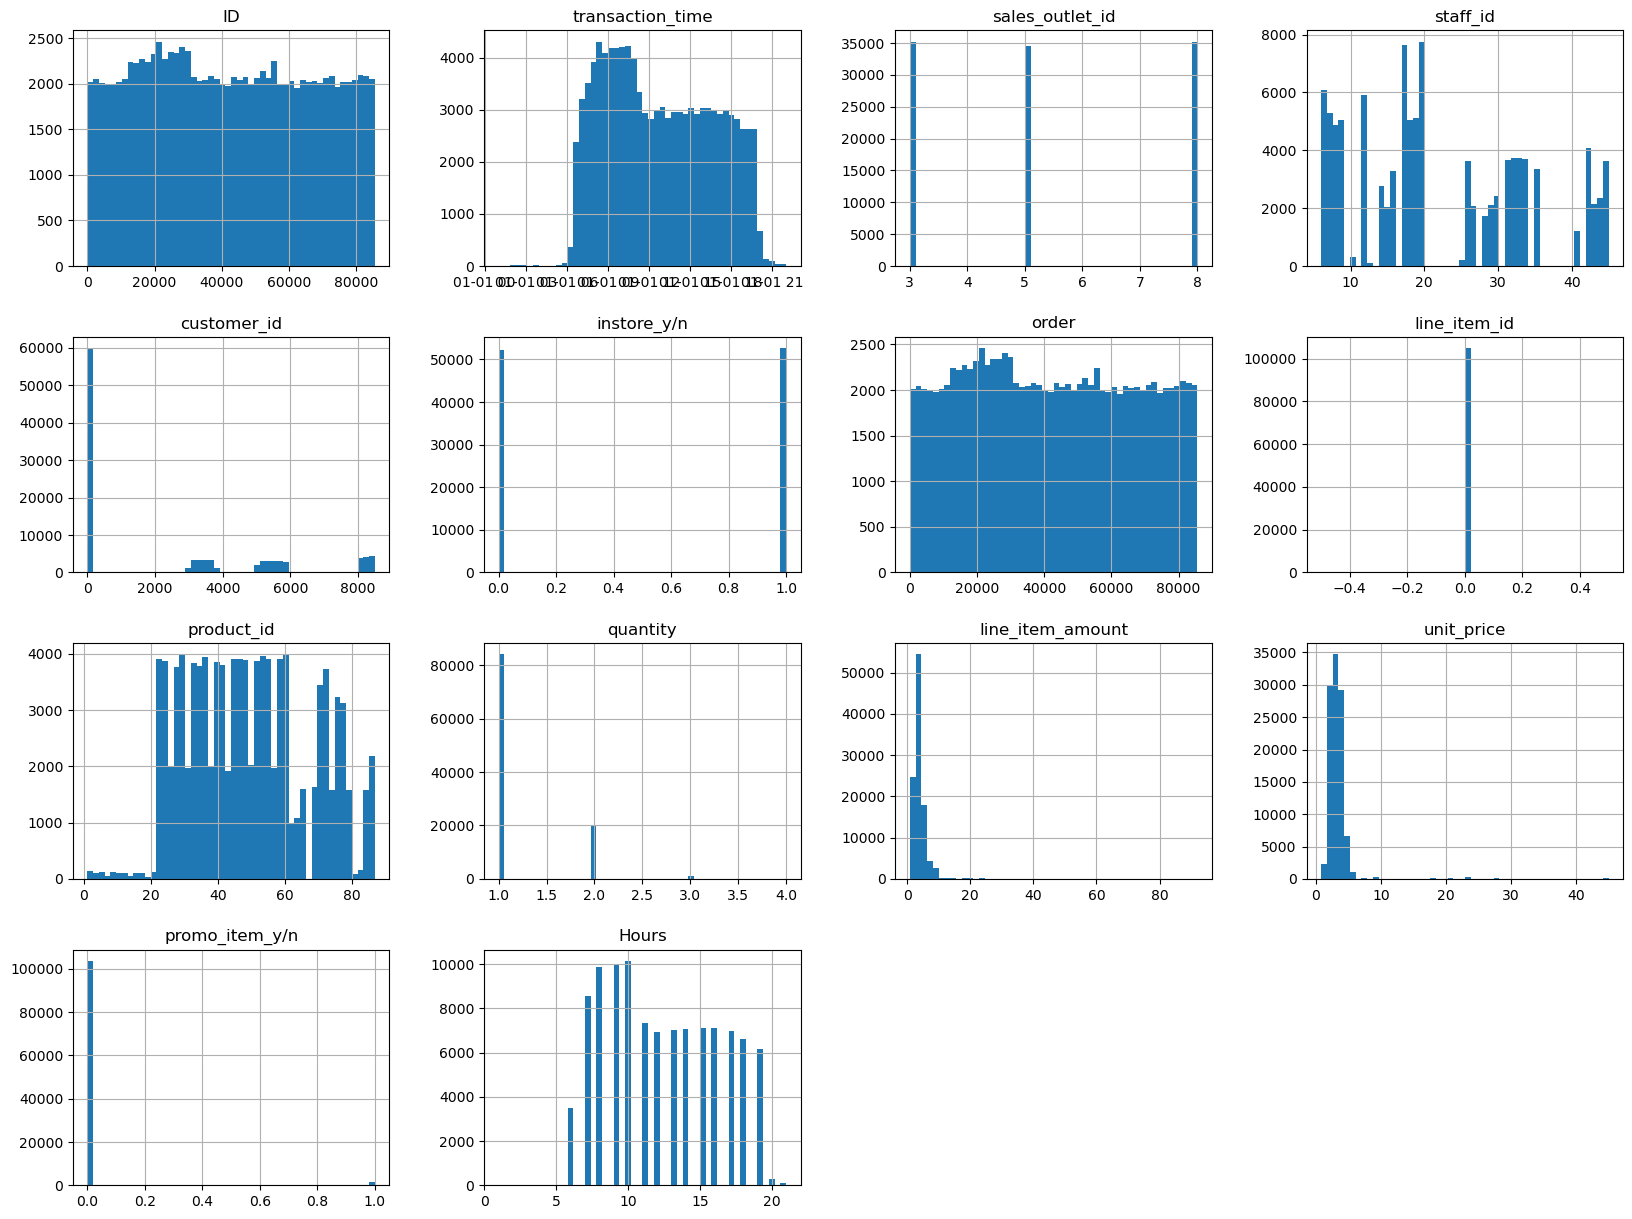

In [19]:
Receipts.hist(bins=50, figsize=(20,15))
plt.show()

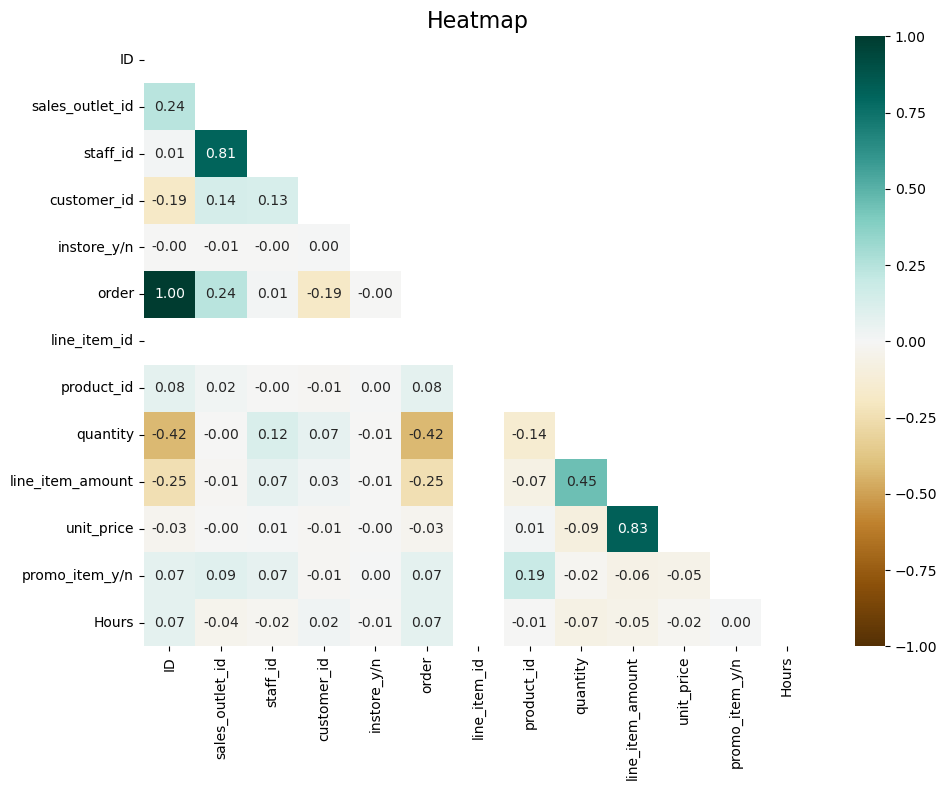

In [20]:
correlation_matrix = Receipts.corr()

# Create masks for lower triangles
lower_triangle_mask = np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool)
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix.where(lower_triangle_mask), cmap="BrBG", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# How many missing values are in columns
Receipts.isna().sum() 

ID                  0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_y/n         0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_y/n      0
Hours               0
dtype: int64

## 1.4. Quantity

In [22]:
Receipts['transaction_date'] = pd.to_datetime(Receipts['transaction_date'], format='%d/%m/%Y')

# Group by 'transaction_date' and sum the 'quantity'
quantity_by_date = Receipts.groupby('transaction_date')['quantity'].sum().reset_index()

# Sort the DataFrame by date
quantity_by_date = quantity_by_date.sort_values(by='transaction_date')

# Display the result
print(quantity_by_date)

   transaction_date  quantity
0        2022-04-01      2391
1        2022-04-02      2354
2        2022-04-03      2398
3        2022-04-04      2300
4        2022-04-05      2330
5        2022-04-06      2104
6        2022-04-07      2387
7        2022-04-08      2586
8        2022-04-09      2354
9        2022-04-10      2537
10       2022-04-11      2403
11       2022-04-12      2397
12       2022-04-13      2733
13       2022-04-14      2323
14       2022-04-15      2555
15       2022-04-16      2592
16       2022-04-17      2510
17       2022-04-18      2548
18       2022-04-19      2632
19       2022-04-20      2429
20       2022-04-21      2492
21       2022-04-22      2576
22       2022-04-23      2560
23       2022-04-24      2766
24       2022-04-25      2615
25       2022-04-26      2614
26       2022-04-27      2856
27       2022-04-28      2188
28       2022-04-29      2075
29       2022-04-30      1948
30       2022-05-01      1797
31       2022-05-02      1815
32       2

In [23]:
quantity_by_date

transaction_date  quantity
0        2022-04-01      2391
1        2022-04-02      2354
2        2022-04-03      2398
3        2022-04-04      2300
4        2022-04-05      2330
5        2022-04-06      2104
6        2022-04-07      2387
7        2022-04-08      2586
8        2022-04-09      2354
9        2022-04-10      2537
10       2022-04-11      2403
11       2022-04-12      2397
12       2022-04-13      2733
13       2022-04-14      2323
14       2022-04-15      2555
15       2022-04-16      2592
16       2022-04-17      2510
17       2022-04-18      2548
18       2022-04-19      2632
19       2022-04-20      2429
20       2022-04-21      2492
21       2022-04-22      2576
22       2022-04-23      2560
23       2022-04-24      2766
24       2022-04-25      2615
25       2022-04-26      2614
26       2022-04-27      2856
27       2022-04-28      2188
28       2022-04-29      2075
29       2022-04-30      1948
30       2022-05-01      1797
31       2022-05-02      1815
32       2022-05-03      1739
33       2022-05-04      1672
34       2022-05-05      1911
35       2022-05-06      1691
36       2022-05-07      1857
37       2022-05-08      1731
38       2022-05-09      1738
39       2022-05-10      1729
40       2022-05-11      1742
41       2022-05-12      1929
42       2022-05-13      1879
43       2022-05-14      1821
44       2022-05-15      1749
45       2022-05-16      1775
46       2022-05-17      1769
47       2022-05-18      1848
48       2022-05-19      1739
49       2022-05-20      1724
50       2022-05-21      1776
51       2022-05-22      1904
52       2022-05-23      1736
53       2022-05-24      1886
54       2022-05-25      1762
55       2022-05-26      1700
56       2022-05-27      1734
57       2022-05-28      1747
58       2022-05-29      1833
59       2022-05-30      1786

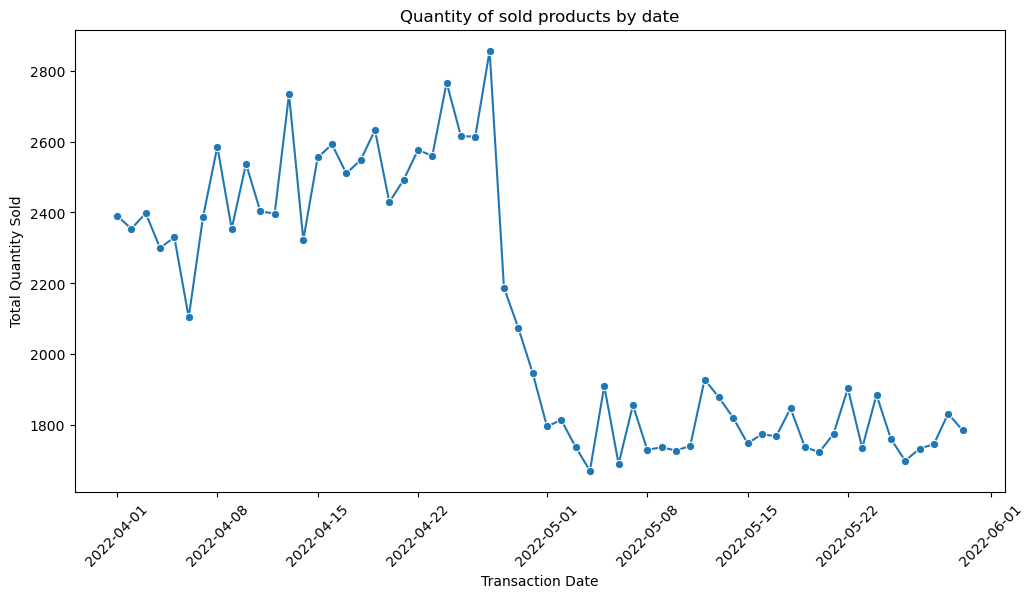

In [24]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_date', y='quantity', data=quantity_by_date, marker='o')
plt.title('Quantity of sold products by date')
plt.xlabel('Transaction Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

## 1.6. Transactions

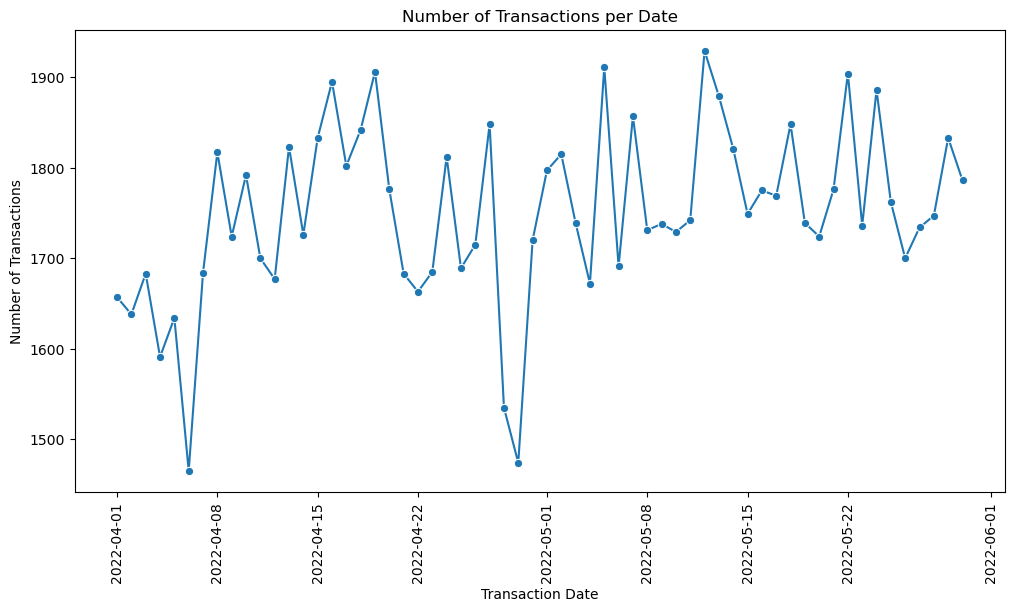

In [25]:
Receipts['transaction_date'] = pd.to_datetime(Receipts['transaction_date'], format='%d/%m/%Y')

# Sort the DataFrame by 'transaction_date'
Receipts_sorted = Receipts.sort_values(by='transaction_date')

# Count the number of transactions per date
transaction_counts = Receipts_sorted['transaction_date'].value_counts()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_counts.index, y=transaction_counts.values, marker='o')
plt.title('Number of Transactions per Date')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

## 1.5. Transactions vs sold quantity

In [26]:
# Group by 'transaction_date' and count the transactions
daily_transaction_counts = Receipts.groupby('transaction_date')['ID'].count().reset_index()

# Rename the columns if needed
daily_transaction_counts.columns = ['date', 'transaction_count']

# Display the resulting DataFrame
daily_transaction_counts.head()

date  transaction_count
0 2022-04-01               1657
1 2022-04-02               1638
2 2022-04-03               1683
3 2022-04-04               1591
4 2022-04-05               1634

In [27]:
# Set 'date' as index
daily_transaction_counts.set_index('date', inplace=True)
quantity_by_date.set_index('transaction_date', inplace=True)

# Merge the two dataframes based on the index (date)
merged_data = pd.merge(daily_transaction_counts, quantity_by_date, left_index=True, right_index=True)

# Display the resulting DataFrame
print(merged_data)

            transaction_count  quantity
date                                   
2022-04-01               1657      2391
2022-04-02               1638      2354
2022-04-03               1683      2398
2022-04-04               1591      2300
2022-04-05               1634      2330
2022-04-06               1465      2104
2022-04-07               1684      2387
2022-04-08               1817      2586
2022-04-09               1724      2354
2022-04-10               1792      2537
2022-04-11               1700      2403
2022-04-12               1677      2397
2022-04-13               1823      2733
2022-04-14               1726      2323
2022-04-15               1833      2555
2022-04-16               1895      2592
2022-04-17               1802      2510
2022-04-18               1842      2548
2022-04-19               1906      2632
2022-04-20               1776      2429
2022-04-21               1683      2492
2022-04-22               1663      2576
2022-04-23               1685      2560


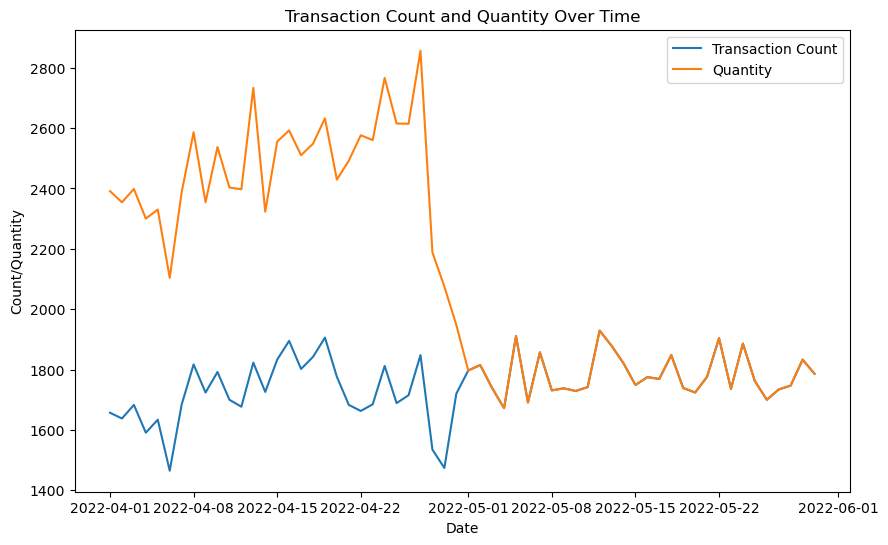

In [28]:
# Plotting the values
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['transaction_count'], label='Transaction Count')
plt.plot(merged_data.index, merged_data['quantity'], label='Quantity')
plt.title('Transaction Count and Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Count/Quantity')
plt.legend()
plt.show()

## Predicting number of transation for next 7 days

In [29]:
# # Count the number of sold products per date
Receipts_F = daily_transaction_counts.copy()
Receipts_F

transaction_count
date                         
2022-04-01               1657
2022-04-02               1638
2022-04-03               1683
2022-04-04               1591
2022-04-05               1634
2022-04-06               1465
2022-04-07               1684
2022-04-08               1817
2022-04-09               1724
2022-04-10               1792
2022-04-11               1700
2022-04-12               1677
2022-04-13               1823
2022-04-14               1726
2022-04-15               1833
2022-04-16               1895
2022-04-17               1802
2022-04-18               1842
2022-04-19               1906
2022-04-20               1776
2022-04-21               1683
2022-04-22               1663
2022-04-23               1685
2022-04-24               1812
2022-04-25               1689
2022-04-26               1715
2022-04-27               1848
2022-04-28               1535
2022-04-29               1474
2022-04-30               1720
2022-05-01               1797
2022-05-02               1815
2022-05-03               1739
2022-05-04               1672
2022-05-05               1911
2022-05-06               1691
2022-05-07               1857
2022-05-08               1731
2022-05-09               1738
2022-05-10               1729
2022-05-11               1742
2022-05-12               1929
2022-05-13               1879
2022-05-14               1821
2022-05-15               1749
2022-05-16               1775
2022-05-17               1769
2022-05-18               1848
2022-05-19               1739
2022-05-20               1724
2022-05-21               1776
2022-05-22               1904
2022-05-23               1736
2022-05-24               1886
2022-05-25               1762
2022-05-26               1700
2022-05-27               1734
2022-05-28               1747
2022-05-29               1833
2022-05-30               1786

In [30]:
# Rename the 'quantity' column to 'y'
Receipts_F.rename(columns={'transaction_count': 'y'}, inplace=True)

In [31]:
# Resample to daily frequency
Receipts_F = Receipts_F.resample('D').asfreq()
Receipts_F.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2022-04-01 to 2022-05-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


### 2.2. Decomposition

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 0.98, 'Additive Decompose')

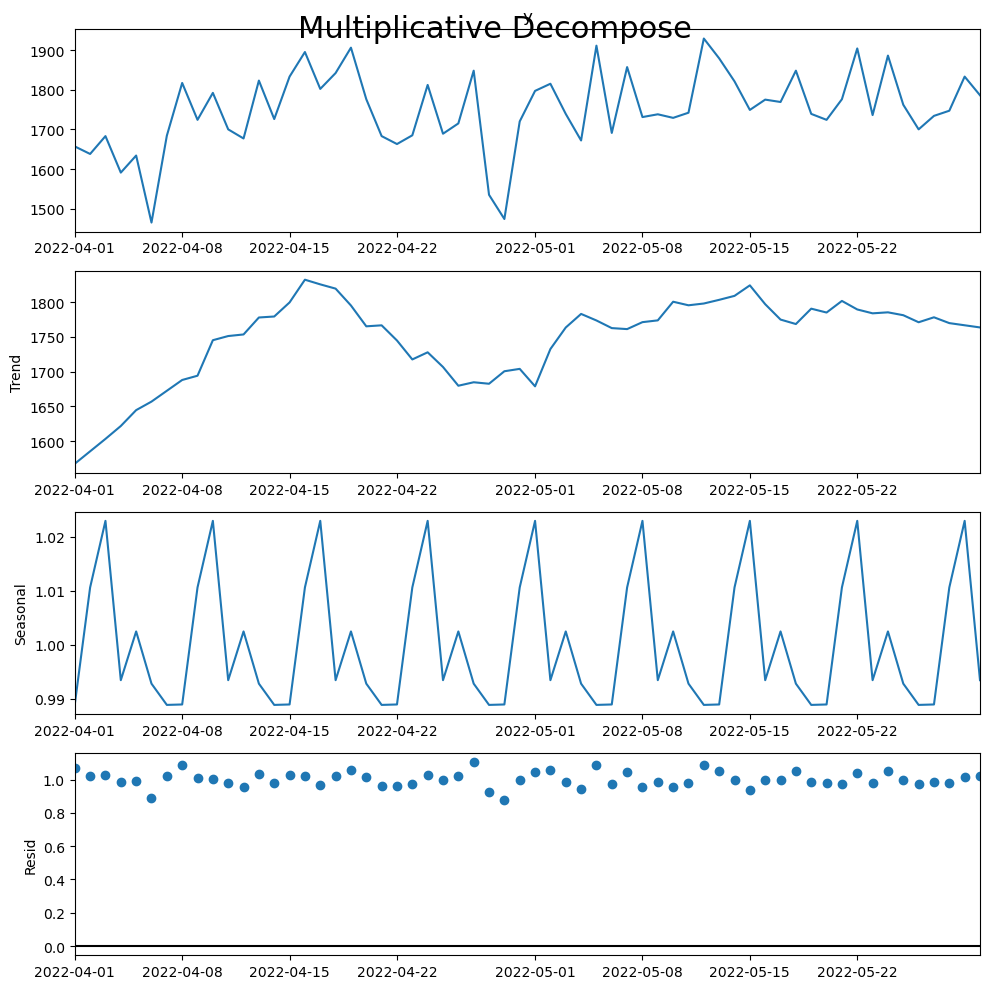

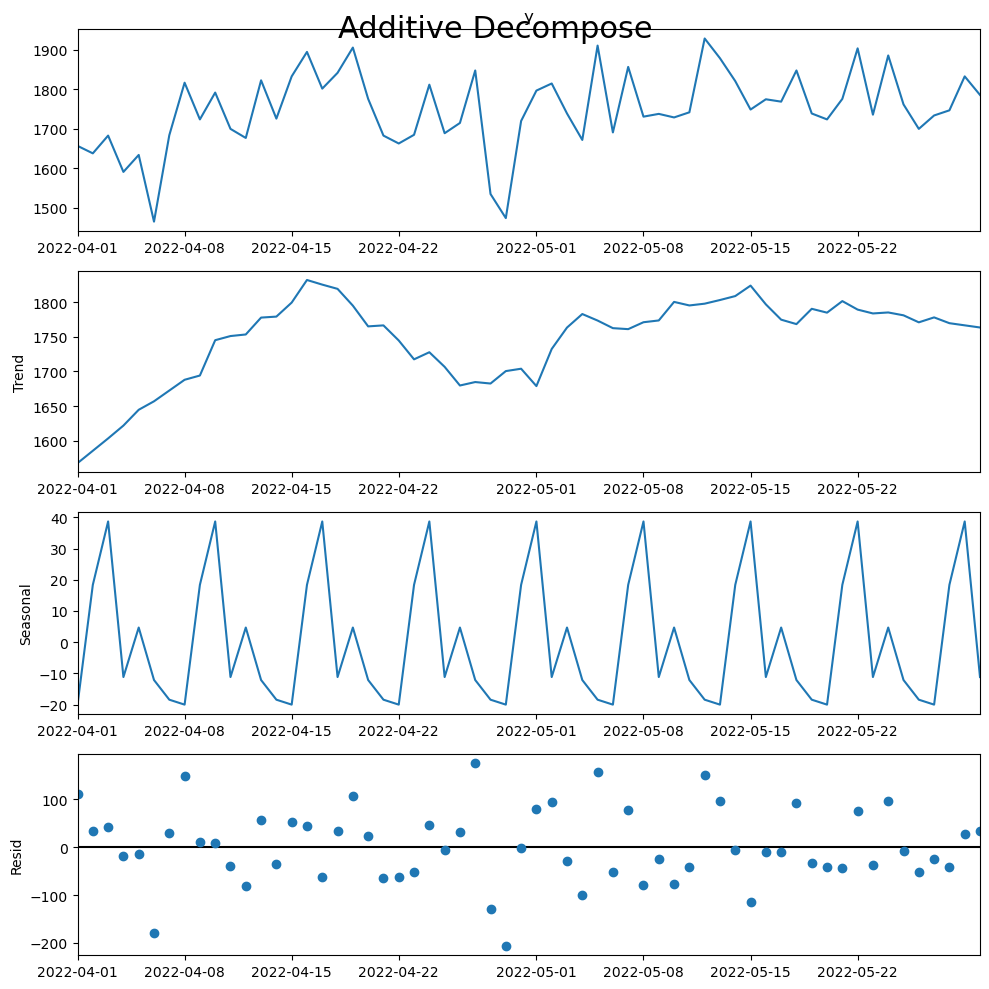

In [33]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(Receipts_F['y'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(Receipts_F['y'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)

In [34]:
result_add = seasonal_decompose(Receipts_F['y'], model='additive', extrapolate_trend='freq')

# Extract components
trend = result_add.trend
seasonal = result_add.seasonal
residuals = result_add.resid

# Create a new DataFrame with components
decomposition_df = pd.DataFrame({
    'y': Receipts_F['y'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residuals': residuals
})
decomposition_df.head()

y        Trend   Seasonal   Residuals
date                                                
2022-04-01  1657  1567.357143 -20.013889  109.656746
2022-04-02  1638  1585.250000  18.373866   34.376134
2022-04-03  1683  1603.142857  38.684524   41.172619
2022-04-04  1591  1621.714286 -11.175454  -19.538832
2022-04-05  1634  1644.571429   4.692460  -15.263889

### 2.3 Stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(Receipts_F['y'])

# Stationarity
print('Dickey Fuller p-value: %F' % stationarity[1])

Dickey Fuller p-value: 0.000003


## ML

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import pmdarima as pm
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
# Create data frame to save models results
Models = pd.DataFrame(columns=['Model', 'MAE', 'MSE','MAPE'])
Models

Empty DataFrame
Columns: [Model, MAE, MSE, MAPE]
Index: []

## ARIMA

In [38]:
Receipts_1 = Receipts_F.copy()

test_days = 7
forecast_days = 7
training_set = Receipts_1.iloc[:-test_days, :]
test_set = Receipts_1.iloc[-test_days:, :]
training_set.tail()

y
date            
2022-05-19  1739
2022-05-20  1724
2022-05-21  1776
2022-05-22  1904
2022-05-23  1736

In [39]:
print(training_set.shape)
print(test_set.shape)

(53, 1)
(7, 1)


In [40]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

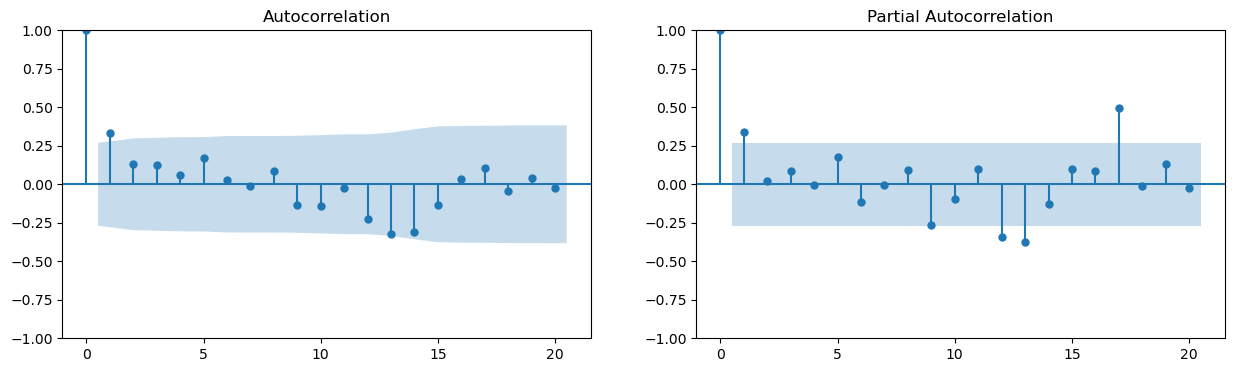

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(training_set['y'], lags=20, ax=axes[0])
plot_pacf(training_set['y'], lags=20, ax=axes[1])
plt.show()

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


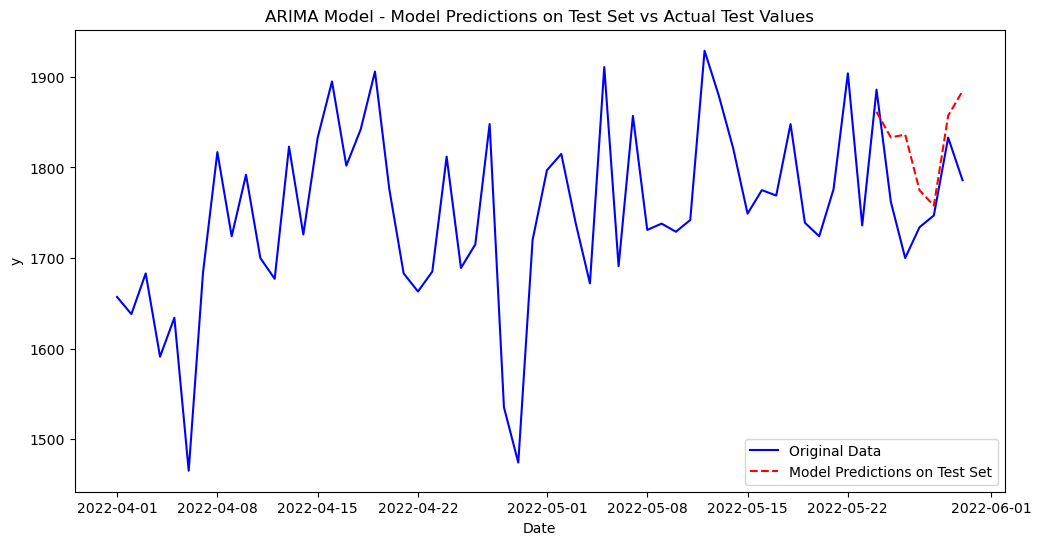

In [42]:
# Best parameters from the previous analysis
order = (1, 1, 9)
seasonal_order = (1, 1, 1, 12)

# Create and fit the ARIMA model on the training set
model = ARIMA(training_set['y'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions on the test set
predictions = results.predict(start=test_set.index[0], end=test_set.index[-1], dynamic=False)

# Plotting the results for the test set only
plt.figure(figsize=(12, 6))

# Plot Original Data
plt.plot(Receipts_1.index, Receipts_1['y'], label='Original Data', color='blue')

# Plot Model Predictions on Test Set
plt.plot(test_set.index, predictions, label='Model Predictions on Test Set', color='red', linestyle='dashed')

plt.title('ARIMA Model - Model Predictions on Test Set vs Actual Test Values')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [43]:
# Calculate MAE and MSE
mae_A = mean_absolute_error(test_set['y'], predictions)
mse_A = mean_squared_error(test_set['y'], predictions)
mape_A = MAPE(test_set['y'], predictions)

# Print MAE and MSE
print(f'Mean Absolute Error (MAE): {mae_A:.2f}')
print(f'Mean Squared Error (MSE): {mse_A:.2f}')
print(f'MAPE: {mape_A:.2f}%')

Mean Absolute Error (MAE): 58.08
Mean Squared Error (MSE): 5189.49
MAPE: 3.31%


In [44]:
# Append results to the DataFrame
Models = Models.append({'Model': 'ARIMA', 'MAE': mae_A, 'MSE': mse_A, 'MAPE': mape_A}, ignore_index=True)

# Reset the index
Models.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(Models)

   Model        MAE          MSE      MAPE
0  ARIMA  58.080532  5189.488311  3.311263


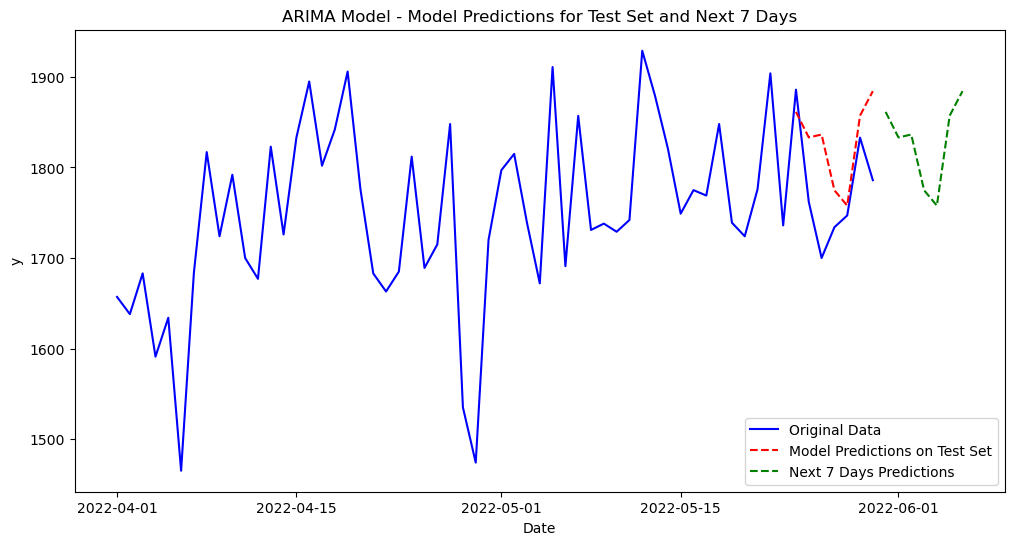

In [45]:
# Make predictions for the next 7 days
next_forecast_days = 7
next_predictions = results.get_forecast(steps=next_forecast_days)

# Plotting the results for the next 7 days
plt.figure(figsize=(12, 6))

# Plot Original Data
plt.plot(Receipts_1.index, Receipts_1['y'], label='Original Data', color='blue')

# Plot Model Predictions on Test Set
plt.plot(test_set.index, predictions, label='Model Predictions on Test Set', color='red', linestyle='dashed')

# Plot Next 7 Days Predictions
next_dates = pd.date_range(test_set.index[-1], periods=next_forecast_days + 1, freq='D')[1:]
plt.plot(next_dates, next_predictions.predicted_mean, label='Next 7 Days Predictions', color='green', linestyle='dashed')

plt.title('ARIMA Model - Model Predictions for Test Set and Next 7 Days')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

## SARIMA

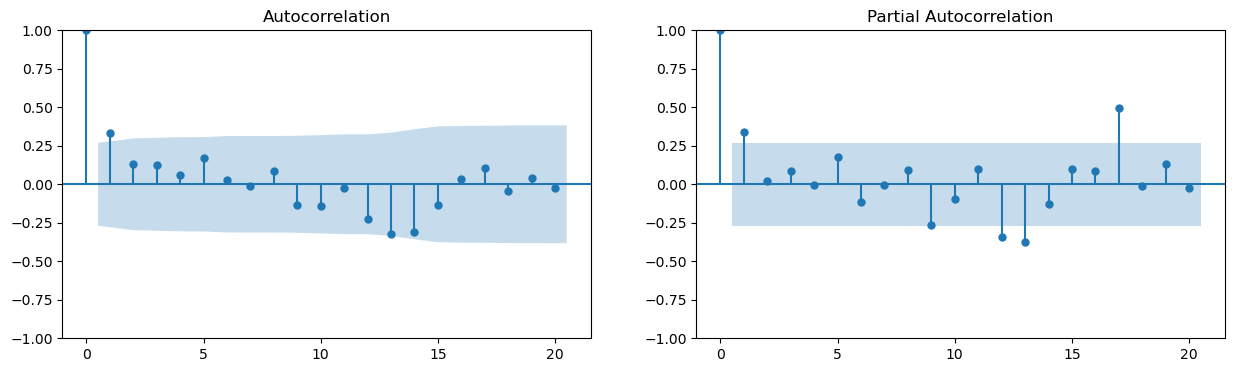

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(training_set['y'], lags=20, ax=axes[0])
plot_pacf(training_set['y'], lags=20, ax=axes[1])
plt.show()

In [47]:
ts = training_set['y']

# Calculate ACF and PACF
acf_values = acf(ts, nlags=20)
pacf_values = pacf(ts, nlags=20)

# Create a DataFrame to display the results
lags_acf = np.arange(1, 21)
lags_pacf = np.arange(1, 21)

results_table = pd.DataFrame({
    'Lag (ACF)': lags_acf,
    'ACF': acf_values[1:],
    'Lag (PACF)': lags_pacf,
    'PACF': pacf_values[1:],
})

# Display the results table
print(results_table)

    Lag (ACF)       ACF  Lag (PACF)      PACF
0           1  0.334211           1  0.340638
1           2  0.131047           2  0.022797
2           3  0.122646           3  0.087047
3           4  0.062019           4 -0.005413
4           5  0.170300           5  0.178339
5           6  0.025793           6 -0.112596
6           7 -0.008885           7 -0.004781
7           8  0.085854           8  0.095390
8           9 -0.135983           9 -0.262041
9          10 -0.143282          10 -0.092998
10         11 -0.023848          11  0.100756
11         12 -0.226834          12 -0.344749
12         13 -0.322481          13 -0.375701
13         14 -0.307796          14 -0.127022
14         15 -0.135686          15  0.101757
15         16  0.036179          16  0.089420
16         17  0.108295          17  0.493695
17         18 -0.041415          18 -0.011761
18         19  0.039081          19  0.129681
19         20 -0.025011          20 -0.023598


In [48]:
# import itertools

# # Define the range of hyperparameter values to search
# p_values = range(0, 2)
# d_values = range(0, 2)
# q_values = range(0, 2)
# P_values = range(0, 2)
# D_values = range(0, 2)
# Q_values = range(0, 2)
# s_values = [5,6,7, 14, 15]

# # Initialize variables to store best hyperparameters and corresponding MAE
# best_mae = float('inf')
# best_params = None

# # Iterate over all possible combinations of hyperparameters
# for p, d, q, P, D, Q, s in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
#     try:
#         # Create and fit the SARIMA model
#         sarima_model = sm.tsa.statespace.SARIMAX(training_set['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
#         sarima_result = sarima_model.fit(disp=False)

#         # Make predictions
#         forecast_steps = len(test_set)
#         predictions = sarima_result.get_forecast(steps=forecast_steps).predicted_mean

#         # Calculate MAE
#         mae = mean_absolute_error(test_set['y'], predictions)

#         # Update best hyperparameters if current combination improves MAE
#         if mae < best_mae:
#             best_mae = mae
#             best_params = {'p': p, 'd': d, 'q': q, 'P': P, 'D': D, 'Q': Q, 's': s}

#         print(f'Hyperparameters: {{"p": {p}, "d": {d}, "q": {q}, "P": {P}, "D": {D}, "Q": {Q}, "s": {s}}}, MAE: {mae:.2f}')
    
#     except Exception as e:
#         print(f'Error for hyperparameters: {{"p": {p}, "d": {d}, "q": {q}, "P": {P}, "D": {D}, "Q": {Q}, "s": {s}}}, Error: {e}')

# # Print the best hyperparameters
# print(f'Best Hyperparameters: {best_params}, Best Mean Absolute Error (MAE): {best_mae:.2f}')

In [ ]:
# Best Hyperparameters: {'p': 0, 'd': 1, 'q': 1, 'P': 1, 'D': 0, 'Q': 1, 's': 14}, Best Mean Absolute Error (MAE): 31.36

Mean Absolute Error (MAE): 31.36
Mean Squared Error (MSE): 1826.29
MAPE: 1.72%


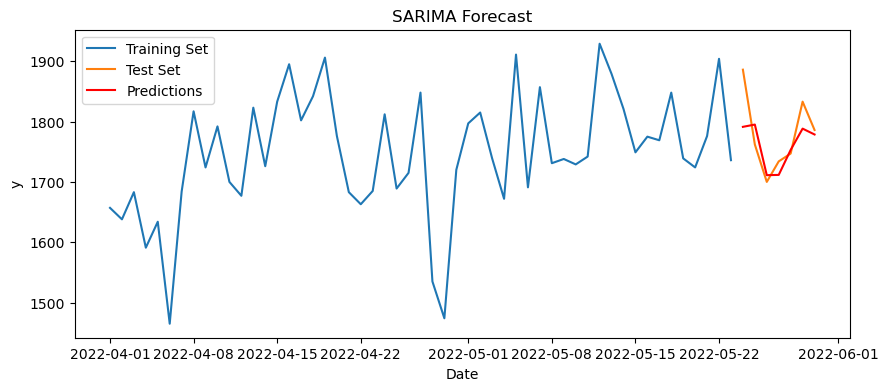

In [49]:
# Non-seasonal parameters
p, d, q = 0,1,1

# Seasonal parameters
P, D, Q, s = 1,0,1,14

# Create and fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(training_set['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Make predictions
forecast_steps = len(test_set)
predictions = sarima_result.get_forecast(steps=forecast_steps).predicted_mean

# Calculate MAE and MSE
mae_S = mean_absolute_error(test_set['y'], predictions)
mse_S = mean_squared_error(test_set['y'], predictions)
mape_S = MAPE(test_set['y'], predictions)

# Print MAE and MSE
print(f'Mean Absolute Error (MAE): {mae_S:.2f}')
print(f'Mean Squared Error (MSE): {mse_S:.2f}')
print(f'MAPE: {mape_S:.2f}%')

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(training_set.index, training_set['y'], label='Training Set')
plt.plot(test_set.index, test_set['y'], label='Test Set')
plt.plot(test_set.index, predictions, label='Predictions', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [50]:
# Add results to the DataFrame
Models = Models.append({'Model': 'SARIMA',
                          'MAE': mae_S,
                          'MSE': mse_S,
                          'MAPE': mape_S}, ignore_index=True)

# Display the results DataFrame
print("\nResults DataFrame:")
print(Models)


Results DataFrame:
    Model        MAE          MSE      MAPE
0   ARIMA  58.080532  5189.488311  3.311263
1  SARIMA  31.357744  1826.288375  1.720971


### ETS

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Mean Absolute Error (MAE): 44.05
Mean Squared Error (MSE): 3205.39
MAPE: 2.47%


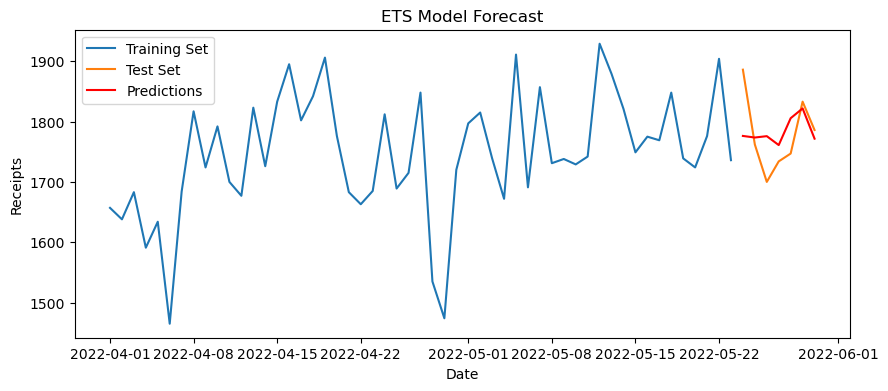

In [52]:
# Auto_arima automatically select the best ETS model
ets_model = ExponentialSmoothing(training_set['y'], seasonal='add', seasonal_periods=7) 
ets_fit = ets_model.fit()

# Forecast for the test set
forecast = ets_fit.forecast(steps=len(test_set))

# Calculate MAE for evaluation
mae_E = mean_absolute_error(test_set['y'], forecast)
mse_E = mean_squared_error(test_set['y'], forecast)
mape_E = MAPE(test_set['y'], forecast)

# Print MAE and MSE
print(f'Mean Absolute Error (MAE): {mae_E:.2f}')
print(f'Mean Squared Error (MSE): {mse_E:.2f}')
print(f'MAPE: {mape_E:.2f}%')

# Plotting the results
plt.figure(figsize=(10, 4))

plt.plot(training_set.index, training_set['y'], label='Training Set')
plt.plot(test_set.index, test_set['y'], label='Test Set')
plt.plot(test_set.index, forecast, label='Predictions', color='red')
plt.title('ETS Model Forecast')
plt.xlabel('Date')
plt.ylabel('Receipts')
plt.legend()
plt.show()

In [53]:
from itertools import product

# Define candidate values for smoothing parameters
alpha_values = [0.2, 0.4, 0.6, 0.8]
beta_values = [0.2, 0.4, 0.6, 0.8]
gamma_values = [0.2, 0.4, 0.6, 0.8]

# Perform grid search
best_mae = float('inf')
best_params = None

for alpha, beta, gamma in product(alpha_values, beta_values, gamma_values):
    ets_model = ExponentialSmoothing(training_set['y'], seasonal='add', seasonal_periods=7,
                                     initialization_method='estimated')
    ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    forecast = ets_fit.forecast(steps=len(test_set))
    
    mae = mean_absolute_error(test_set['y'], forecast)
    
    if mae < best_mae:
        best_mae = mae
        best_params = (alpha, beta, gamma)

print(f'Best parameters: {best_params}')

Best parameters: (0.6, 0.2, 0.2)


Mean Absolute Error (MAE): 39.20
Mean Squared Error (MSE): 2794.95
MAPE: 2.18%


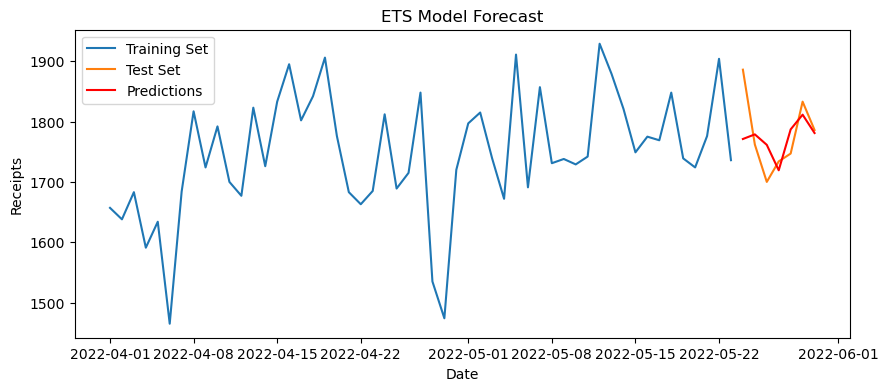

In [54]:
# Train the ETS model with the best parameters
ets_model = ExponentialSmoothing(training_set['y'], seasonal='add', seasonal_periods=7,
                                 initialization_method='estimated')
ets_fit = ets_model.fit(smoothing_level=0.6, smoothing_slope=0.2, smoothing_seasonal=0.2)

# Forecast for the test set
forecast = ets_fit.forecast(steps=len(test_set))

# Calculate MAE for evaluation
mae_E = mean_absolute_error(test_set['y'], forecast)
mse_E = mean_squared_error(test_set['y'], forecast)
mape_E = MAPE(test_set['y'], forecast)

# Print MAE and MSE
print(f'Mean Absolute Error (MAE): {mae_E:.2f}')
print(f'Mean Squared Error (MSE): {mse_E:.2f}')
print(f'MAPE: {mape_E:.2f}%')

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(training_set.index, training_set['y'], label='Training Set')
plt.plot(test_set.index, test_set['y'], label='Test Set')
plt.plot(test_set.index, forecast, label='Predictions', color='red')
plt.title('ETS Model Forecast')
plt.xlabel('Date')
plt.ylabel('Receipts')
plt.legend()
plt.show()

In [55]:
# Add results to the DataFrame
Models = Models.append({'Model': 'ETS',
                          'MAE': mae_E,
                          'MSE': mse_E,
                          'MAPE': mape_E}, ignore_index=True)

# Display the results DataFrame
print("\nResults DataFrame:")
print(Models)


Results DataFrame:
    Model        MAE          MSE      MAPE
0   ARIMA  58.080532  5189.488311  3.311263
1  SARIMA  31.357744  1826.288375  1.720971
2     ETS  39.203671  2794.954126  2.179270


## Models comparison

In [56]:
import plotly.express as px

In [57]:
# Sort by MAE
Models_sorted_mae = Models.sort_values(by='MAE')

# Normalize MAE values for color mapping
normalized_mae = (Models_sorted_mae['MAE'] - Models_sorted_mae['MAE'].min()) / (Models_sorted_mae['MAE'].max() - Models_sorted_mae['MAE'].min())

# Chart for MAE with customized colors (dark green to light green)
fig_mae = px.bar(
    Models_sorted_mae, 
    x='Model', 
    y='MAE', 
    title='MAE Comparison', 
    labels={'MAE': 'MAE'},
    color=normalized_mae, 
    color_continuous_scale='Greens_r',
)
fig_mae.update_xaxes(categoryorder='total ascending')
fig_mae.show()

In [58]:
# Sort by MSE
Models_sorted_mse = Models.sort_values(by='MSE')

# Normalize MSE values for color mapping
normalized_mse = (Models_sorted_mse['MSE'] - Models_sorted_mse['MSE'].min()) / (Models_sorted_mse['MSE'].max() - Models_sorted_mse['MSE'].min())

# Chart for MSE with customized colors (dark green to light green)
fig_mse = px.bar(
    Models_sorted_mse, 
    x='Model', 
    y='MSE', 
    title='MSE Comparison', 
    labels={'MSE': 'MSE'},
    color=normalized_mse, 
    color_continuous_scale='Greens_r',
)
fig_mse.update_xaxes(categoryorder='total ascending')
fig_mse.show()

In [59]:
# Sort by MAPE
Models_sorted_mape = Models.sort_values(by='MAPE')

# Normalize MAPE values for color mapping
normalized_mape = (Models_sorted_mape['MAPE'] - Models_sorted_mape['MAPE'].min()) / (Models_sorted_mape['MAPE'].max() - Models_sorted_mape['MAPE'].min())

# Chart for MAPE
fig_mape = px.bar(
    Models_sorted_mape, 
    x='Model', 
    y='MAPE', 
    title='MAPE Comparison', 
    labels={'MAPE': 'MAPE'},
    color=normalized_mape, 
    color_continuous_scale='Greens_r',
)
fig_mape.update_xaxes(categoryorder='total ascending')
fig_mape.show()

## Predicting number of transaction for next 7 days

In [60]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [61]:
# Concatenate the training and test sets to the full dataset
full_data = pd.concat([training_set, test_set])
full_data.tail()

y
date            
2022-05-26  1700
2022-05-27  1734
2022-05-28  1747
2022-05-29  1833
2022-05-30  1786

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided

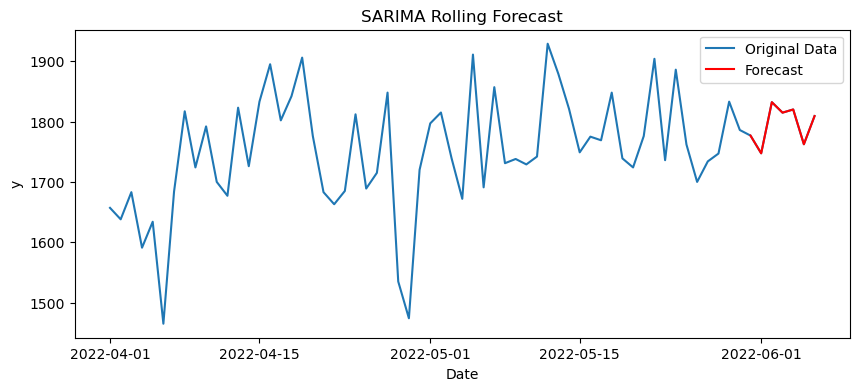

In [62]:
# Non-seasonal parameters
p, d, q = 0,1,1

# Seasonal parameters
P, D, Q, s = 1,0,1,14


# Number of days to predict
forecast_steps = 7

# Perform rolling forecast
for i in range(forecast_steps):
    
    # Create and fit the SARIMA model on the current dataset
    sarima_model = sm.tsa.statespace.SARIMAX(full_data['y'], order=(p, d, q), seasonal_order=(P, D, Q, s), freq='D')
    sarima_result = sarima_model.fit(disp=False)

    # Forecast the next day
    forecast = sarima_result.get_forecast(steps=1).predicted_mean

    # Append the forecasted value to the dataset
    full_data = full_data.append(pd.DataFrame({'y': forecast}, index=[full_data.index[-1] + pd.DateOffset(1)]))

# Extract the predicted values
predictions = full_data[-forecast_steps:]

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(full_data.index, full_data['y'], label='Original Data')
plt.plot(predictions.index, predictions['y'], label='Forecast', color='red')
plt.title('SARIMA Rolling Forecast')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

# 2. Customers data sest

In [63]:
df2 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\IBM Datasets\\customer.csv")
df2.head()

customer_id  home_store customer_first-name        customer_email  \
0         3001           3           Kelly Key  Venus@adipiscing.edu   
1         3002           3     Clark Schroeder        Nora@fames.gov   
2         3003           3      Elvis Cardenas    Brianna@tellus.edu   
3         3004           3        Rafael Estes           Ina@non.gov   
4         3005           3          Colin Lynn      Dale@Integer.com   

  customer_since loyalty_card_number   birthdate  gender  birth_year  
0     04/01/2017        908-424-2890  29/05/1950       0        1950  
1     07/01/2017        032-732-6308  30/07/1950       0        1950  
2     10/01/2017        459-375-9187  30/09/1950       0        1950  
3     13/01/2017        576-640-9226  01/12/1950       0        1950  
4     15/01/2017        344-674-6569  01/02/1951       0        1951

## 2.1. EDA

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   int64 
 8   birth_year           2246 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 158.0+ KB


In [65]:
# Count duplicates
duplicate_count = df2.duplicated().sum()

# Print one duplicate entry
if duplicate_count > 0:
    duplicate_entry = df2[df2.duplicated()].head(1)
    print(f"Duplicate Count: {duplicate_count}")
else:
    print("No duplicates found.")

No duplicates found.


In [66]:
# Select only non-object columns
numeric_columns = df2.select_dtypes(exclude='object').columns

df2[numeric_columns].describe() 

customer_id   home_store       gender   birth_year
count  2246.000000  2246.000000  2246.000000  2246.000000
mean   5354.468388     4.956812     0.569902  1978.385574
std    1814.870528     1.852562     0.495200    14.925503
min    3001.000000     3.000000     0.000000  1950.000000
25%    3562.250000     3.000000     0.000000  1965.000000
50%    5323.500000     5.000000     1.000000  1981.000000
75%    5884.750000     5.000000     1.000000  1991.000000
max    8501.000000     8.000000     1.000000  2001.000000

## Merging data sets

In [67]:
# Merge 'Receipts' and 'df2' on 'customer_id' with a left join
transactions_df = pd.merge(Receipts, df2, on='customer_id', how='left')
transactions_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  ...  \
0            0            0      1             0          38  ...   
1            0            0      1             0          84  ...   
2            0            0      2             0          51  ...   
3            0            1      3             0          33  ...   
4         8232            1      4             0          27  ...   

   promo_item_y/n  Hours  home_store  customer_first-name     customer_email  \
0               0      9         NaN                  NaN                NaN   
1               0      9         NaN                  NaN                NaN   
2               0      8         NaN                  NaN                NaN   
3               0      9         NaN                  NaN                NaN   
4               0      8         8.0                Ronan  Molly@viverra.com   

   customer_since loyalty_card_number   birthdate gender birth_year  
0             NaN                 NaN         NaN    NaN        NaN  
1             NaN                 NaN         NaN    NaN        NaN  
2             NaN                 NaN         NaN    NaN        NaN  
3             NaN                 NaN         NaN    NaN        NaN  
4      24/01/2018        399-005-7357  20/03/1974    0.0     1974.0  

[5 rows x 23 columns]

In [68]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105008 entries, 0 to 105007
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   105008 non-null  int64         
 1   transaction_date     105008 non-null  datetime64[ns]
 2   transaction_time     105008 non-null  datetime64[ns]
 3   sales_outlet_id      105008 non-null  int64         
 4   staff_id             105008 non-null  int64         
 5   customer_id          105008 non-null  int64         
 6   instore_y/n          105008 non-null  int64         
 7   order                105008 non-null  int64         
 8   line_item_id         105008 non-null  int64         
 9   product_id           105008 non-null  int64         
 10  quantity             105008 non-null  int64         
 11  line_item_amount     105008 non-null  float64       
 12  unit_price           105008 non-null  float64       
 13  promo_item_y/n

In [69]:
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'], format='%d/%m/%Y')
transactions_df['birthdate'] = pd.to_datetime(transactions_df['birthdate'], format='%d/%m/%Y')
transactions_df['customer_since'] = pd.to_datetime(transactions_df['customer_since'], format='%d/%m/%Y')

In [70]:
columns_to_drop = ['customer_first-name', 'customer_email', 'loyalty_card_number']
transactions_df = transactions_df.drop(columns=columns_to_drop)

In [71]:
transactions_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
0            0            0      1             0          38         2   
1            0            0      1             0          84         1   
2            0            0      2             0          51         2   
3            0            1      3             0          33         1   
4         8232            1      4             0          27         1   

   line_item_amount  unit_price  promo_item_y/n  Hours  home_store  \
0               7.5        3.75               0      9         NaN   
1               0.8        0.80               0      9         NaN   
2               6.0        3.00               0      8         NaN   
3               3.5        3.50               0      9         NaN   
4               3.5        3.50               0      8         8.0   

  customer_since  birthdate  gender  birth_year  
0            NaT        NaT     NaN         NaN  
1            NaT        NaT     NaN         NaN  
2            NaT        NaT     NaN         NaN  
3            NaT        NaT     NaN         NaN  
4     2018-01-24 1974-03-20     0.0      1974.0

In [72]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105008 entries, 0 to 105007
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                105008 non-null  int64         
 1   transaction_date  105008 non-null  datetime64[ns]
 2   transaction_time  105008 non-null  datetime64[ns]
 3   sales_outlet_id   105008 non-null  int64         
 4   staff_id          105008 non-null  int64         
 5   customer_id       105008 non-null  int64         
 6   instore_y/n       105008 non-null  int64         
 7   order             105008 non-null  int64         
 8   line_item_id      105008 non-null  int64         
 9   product_id        105008 non-null  int64         
 10  quantity          105008 non-null  int64         
 11  line_item_amount  105008 non-null  float64       
 12  unit_price        105008 non-null  float64       
 13  promo_item_y/n    105008 non-null  int64         
 14  Hour

In [73]:
numeric_columns = transactions_df.select_dtypes(exclude='object').columns

transactions_df[numeric_columns].describe() 

ID  sales_outlet_id       staff_id    customer_id  \
count  105008.000000    105008.000000  105008.000000  105008.000000   
mean    42266.766599         5.335860      22.332375    2365.497200   
std     24570.047541         2.061759      11.811084    3003.816626   
min         1.000000         3.000000       6.000000       0.000000   
25%     21131.000000         3.000000      12.000000       0.000000   
50%     41586.000000         5.000000      19.000000       0.000000   
75%     63546.000000         8.000000      32.000000    5176.000000   
max     85585.000000         8.000000      45.000000    8501.000000   

         instore_y/n          order  line_item_id     product_id  \
count  105008.000000  105008.000000      105008.0  105008.000000   
mean        0.502000   42266.766599           0.0      49.332775   
std         0.499998   24570.047541           0.0      18.050658   
min         0.000000       1.000000           0.0       1.000000   
25%         0.000000   21131.000000           0.0      34.000000   
50%         1.000000   41586.000000           0.0      48.000000   
75%         1.000000   63546.000000           0.0      61.000000   
max         1.000000   85585.000000           0.0      87.000000   

            quantity  line_item_amount     unit_price  promo_item_y/n  \
count  105008.000000     105008.000000  105008.000000   105008.000000   
mean        1.210117          3.931559       3.314426        0.012475   
std         0.432805          2.407574       2.024389        0.110994   
min         1.000000          0.800000       0.800000        0.000000   
25%         1.000000          3.000000       2.500000        0.000000   
50%         1.000000          3.250000       3.000000        0.000000   
75%         1.000000          4.400000       3.750000        0.000000   
max         4.000000         92.000000      45.000000        1.000000   

               Hours    home_store        gender    birth_year  
count  105008.000000  45009.000000  45009.000000  45009.000000  
mean       12.291006      5.132196      0.567242   1978.420649  
std         3.895217      1.957565      0.495463     15.028932  
min         1.000000      3.000000      0.000000   1950.000000  
25%         9.000000      3.000000      0.000000   1965.000000  
50%        12.000000      5.000000      1.000000   1981.000000  
75%        16.000000      8.000000      1.000000   1992.000000  
max        21.000000      8.000000      1.000000   2001.000000

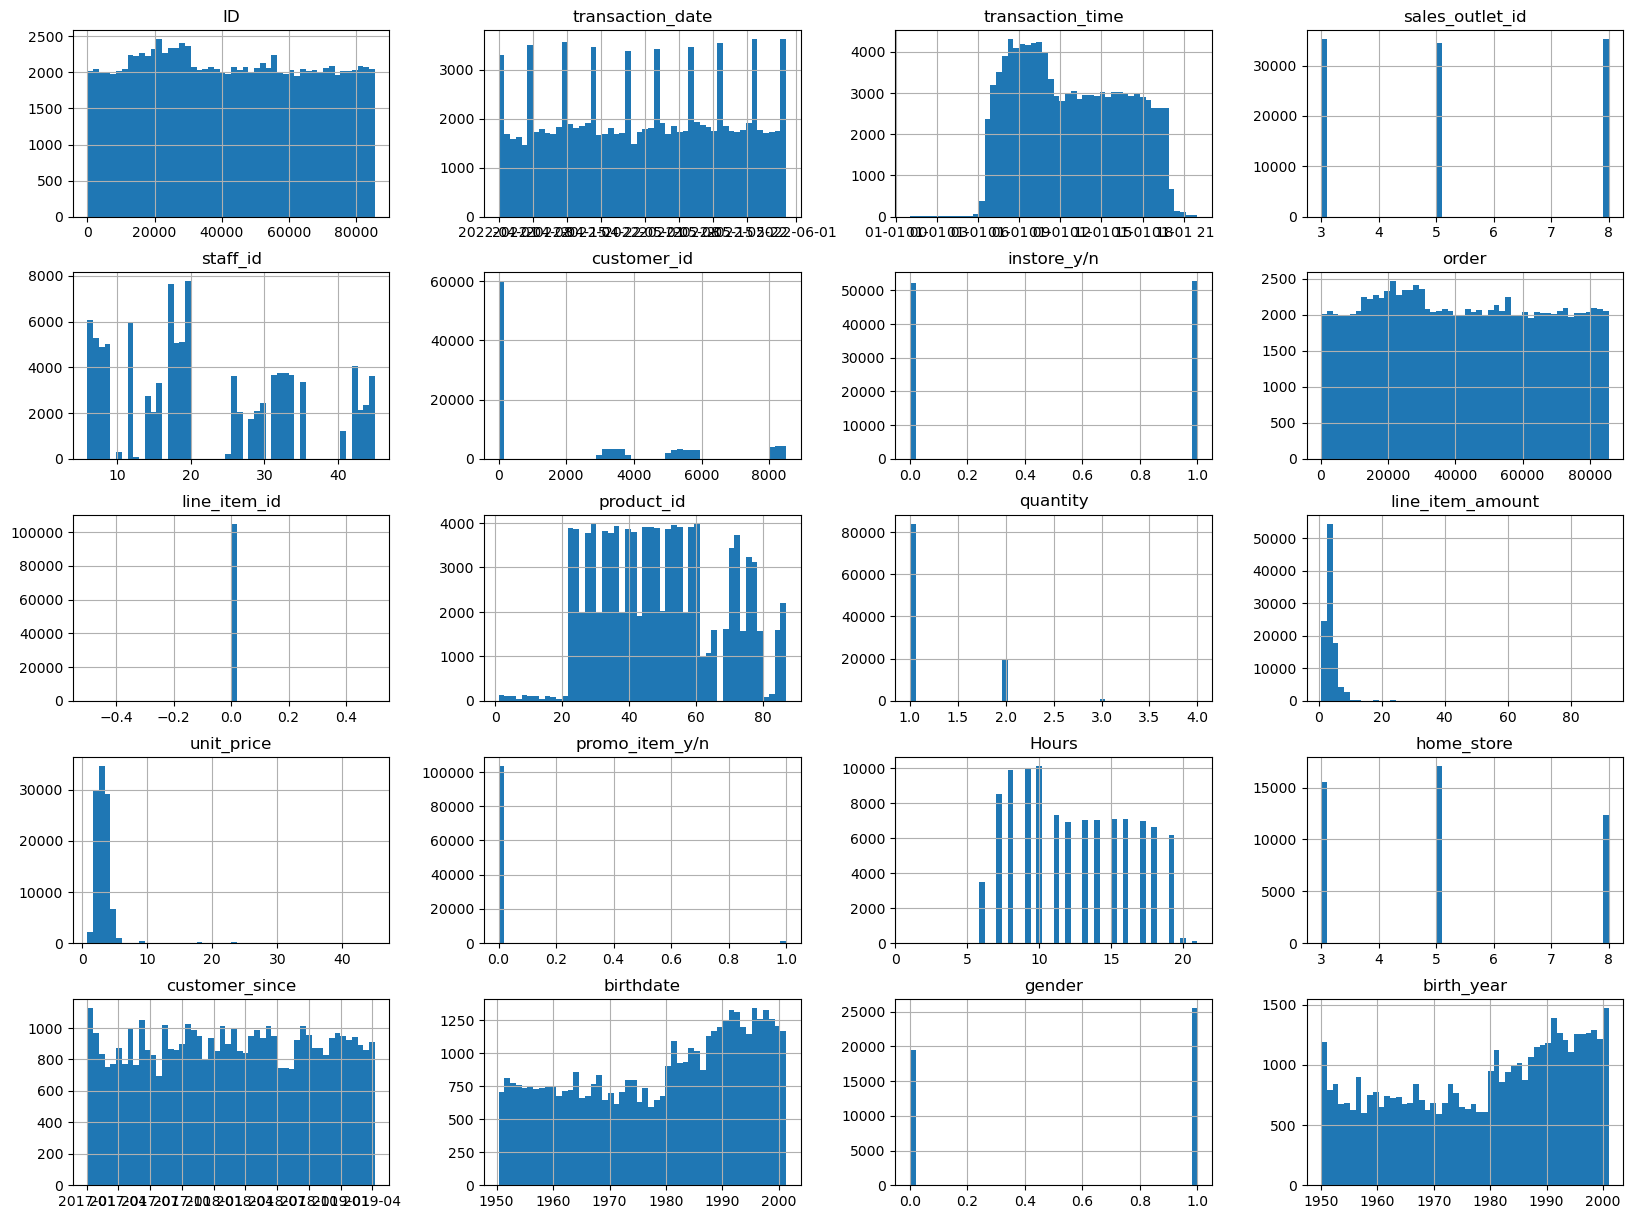

In [74]:
transactions_df.hist(bins=50, figsize=(20,15))
plt.show()

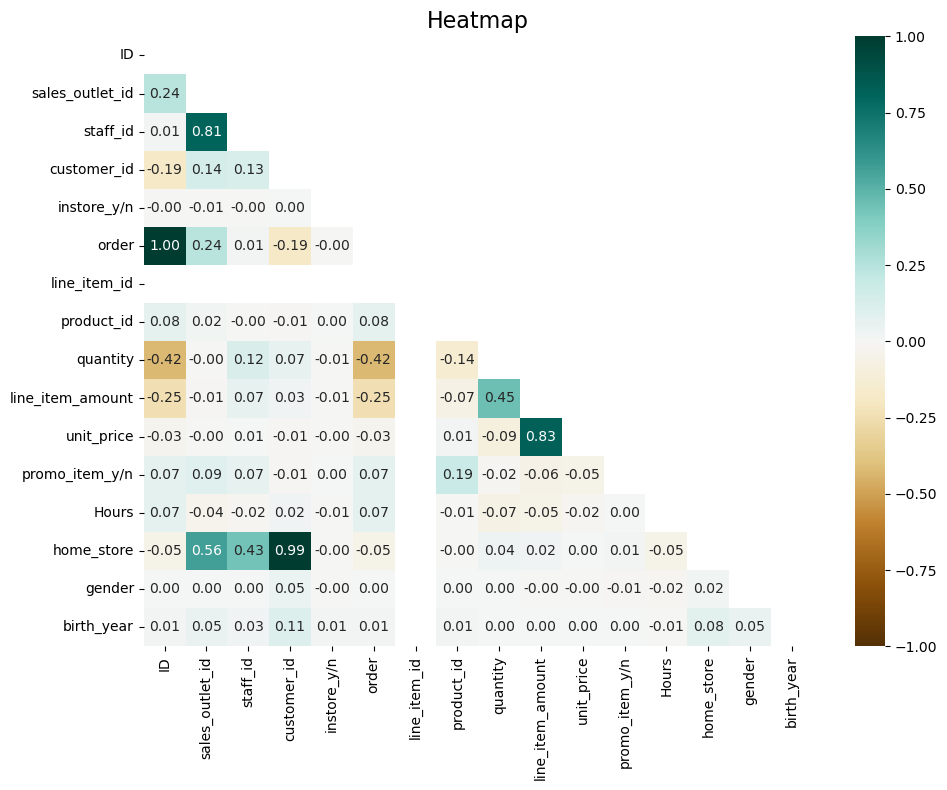

In [75]:
correlation_matrix = transactions_df.corr()

# Create masks for lower triangles
lower_triangle_mask = np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool)
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix.where(lower_triangle_mask), cmap="BrBG", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

### Checking transactions per day of the week

In [76]:
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

# Extract the day of the week and create a new column 'day_of_week'
transactions_df['day_of_week'] = transactions_df['transaction_date'].dt.day_name()

# Display the DataFrame with the 'day_of_week' column
print(transactions_df[['transaction_date', 'day_of_week']])

       transaction_date day_of_week
0            2022-04-27   Wednesday
1            2022-04-27   Wednesday
2            2022-04-27   Wednesday
3            2022-04-27   Wednesday
4            2022-04-27   Wednesday
...                 ...         ...
105003       2022-05-16      Monday
105004       2022-05-13      Friday
105005       2022-05-13      Friday
105006       2022-05-13      Friday
105007       2022-05-13      Friday

[105008 rows x 2 columns]


In [77]:
transactions_df['day_of_week'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

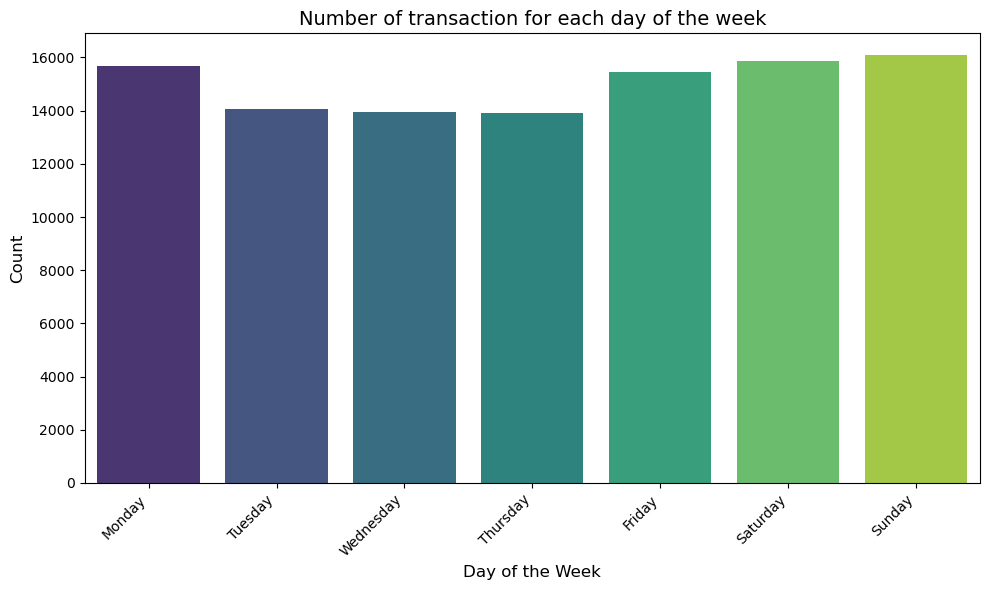

In [78]:
# Calculate the count of rows for each day of the week
day_counts = transactions_df['day_of_week'].value_counts().reset_index()
day_counts.columns = ['Day of the Week', 'Count']

# Sort days of the week in the correct order (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.sort_values(by='Day of the Week', key=lambda x: x.map({day: i for i, day in enumerate(days_order)}))

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_counts, x='Day of the Week', y='Count', palette='viridis')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of transaction for each day of the week', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Checking transactions per hour of the day

In [79]:
transactions_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  ...  \
0            0            0      1             0          38  ...   
1            0            0      1             0          84  ...   
2            0            0      2             0          51  ...   
3            0            1      3             0          33  ...   
4         8232            1      4             0          27  ...   

   line_item_amount  unit_price  promo_item_y/n  Hours  home_store  \
0               7.5        3.75               0      9         NaN   
1               0.8        0.80               0      9         NaN   
2               6.0        3.00               0      8         NaN   
3               3.5        3.50               0      9         NaN   
4               3.5        3.50               0      8         8.0   

   customer_since  birthdate gender  birth_year  day_of_week  
0             NaT        NaT    NaN         NaN    Wednesday  
1             NaT        NaT    NaN         NaN    Wednesday  
2             NaT        NaT    NaN         NaN    Wednesday  
3             NaT        NaT    NaN         NaN    Wednesday  
4      2018-01-24 1974-03-20    0.0      1974.0    Wednesday  

[5 rows x 21 columns]

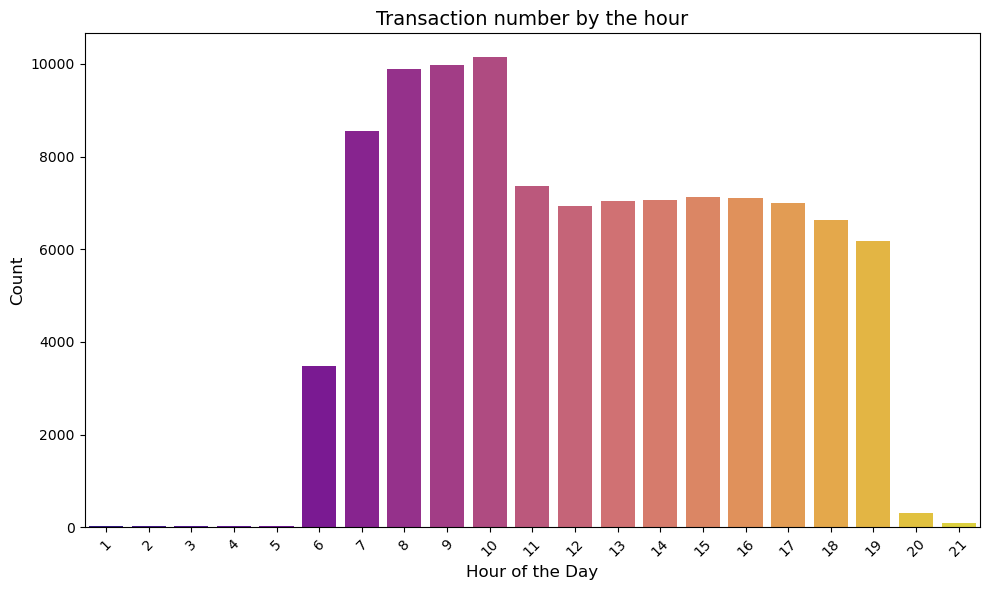

In [80]:
# Calculate the count of rows for each hour
hour_counts = transactions_df['Hours'].value_counts().reset_index()
hour_counts.columns = ['Hours', 'Count']

# Sort hours in chronological order
hour_counts = hour_counts.sort_values(by='Hours')

# Create bar plot for hours
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_counts, x='Hours', y='Count', palette='plasma')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Transaction number by the hour', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

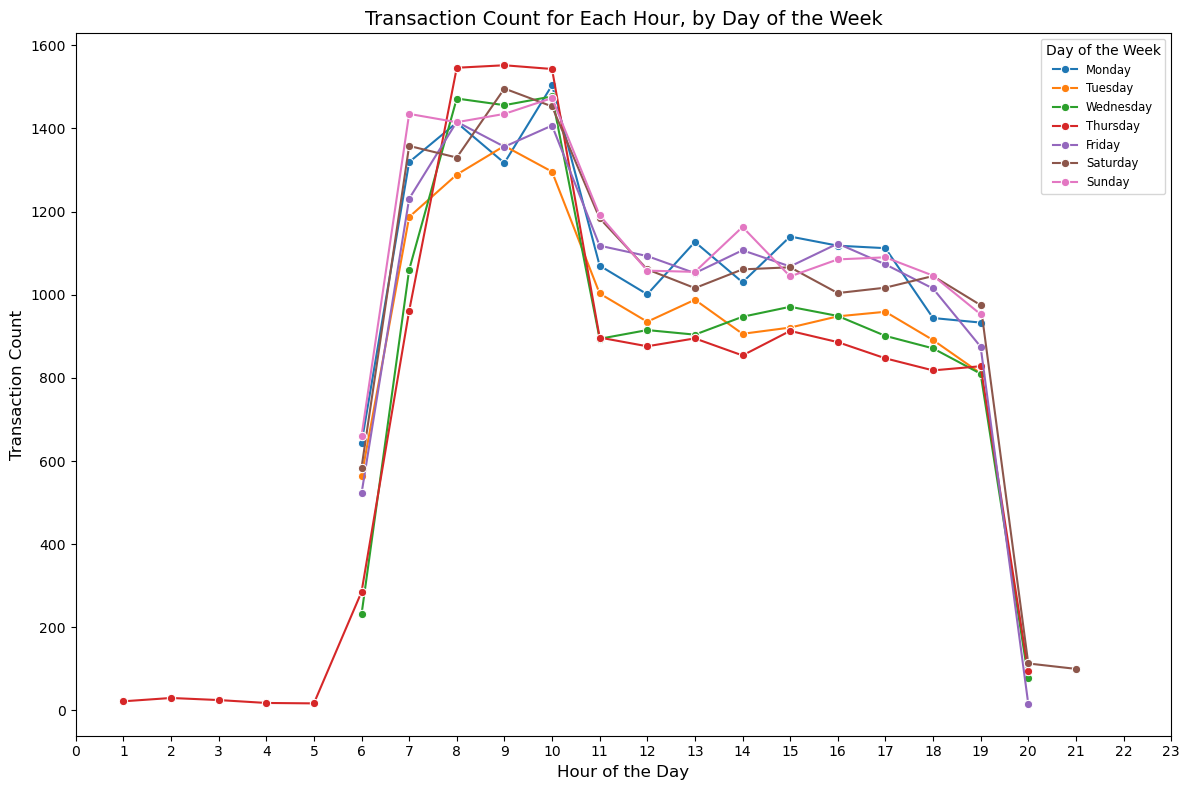

In [81]:
# Calculate counts for each day-hour combination
day_hour_counts = transactions_df.groupby(['day_of_week', 'Hours']).size().reset_index(name='Transaction Count')

# Set the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create line charts for each day of the week
plt.figure(figsize=(12, 8))

for day in days_order:
    day_data = day_hour_counts[day_hour_counts['day_of_week'] == day]
    sns.lineplot(data=day_data, x='Hours', y='Transaction Count', label=day, marker='o')

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.title('Transaction Count for Each Hour, by Day of the Week', fontsize=14)
plt.legend(title='Day of the Week', fontsize='small')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

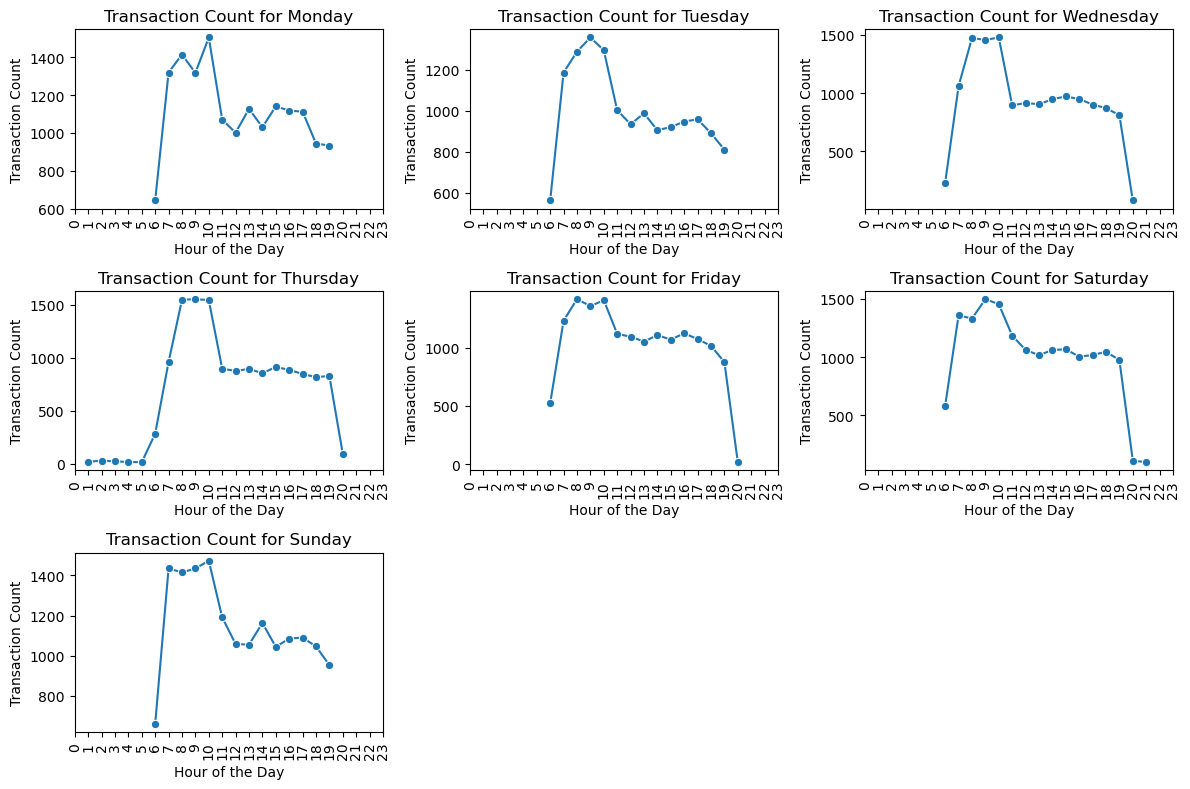

In [82]:
# Calculate counts for each day-hour combination
day_hour_counts = transactions_df.groupby(['day_of_week', 'Hours']).size().reset_index(name='Transaction Count')

# Set the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create individual line charts for each day of the week
plt.figure(figsize=(12, 8))

for i, day in enumerate(days_order, 1):
    plt.subplot(3, 3, i)
    day_data = day_hour_counts[day_hour_counts['day_of_week'] == day]
    sns.lineplot(data=day_data, x='Hours', y='Transaction Count', marker='o')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Transaction Count')
    plt.title(f'Transaction Count for {day}')
    plt.xticks(rotation=90) 
    plt.xticks(range(24))

plt.tight_layout()
plt.show()

### Products

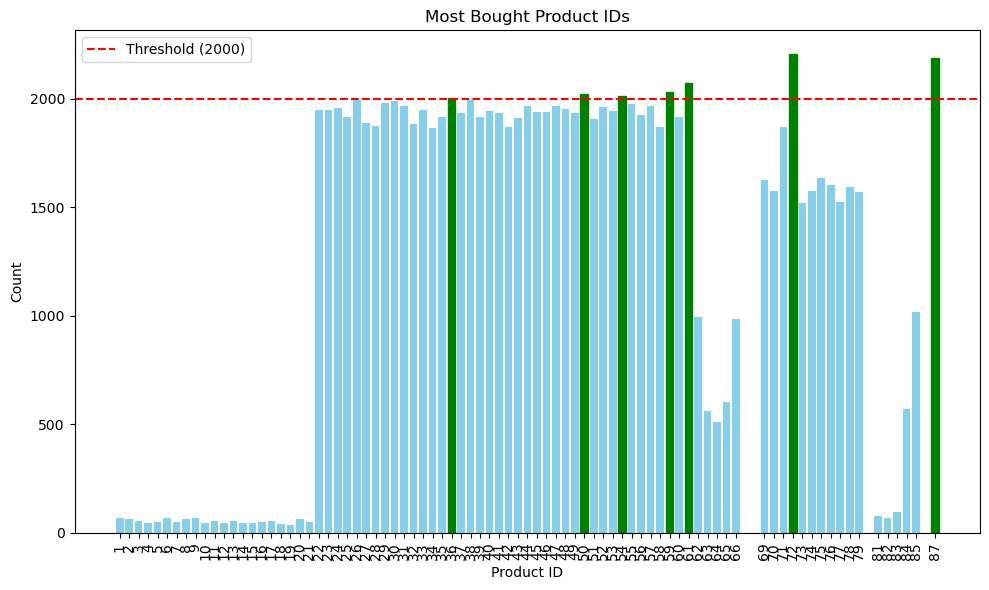

In [83]:
# Calculate counts for each product ID
product_counts = transactions_df['product_id'].value_counts().reset_index()
product_counts.columns = ['Product ID', 'Count']

# Sort product IDs by count in descending order
product_counts = product_counts.sort_values(by='Count', ascending=False)

# Create a bar plot for most bought product IDs
plt.figure(figsize=(10, 6))
bars = plt.bar(product_counts['Product ID'], product_counts['Count'], color='skyblue')
plt.axhline(y=2000, color='red', linestyle='--', label='Threshold (2000)')

# Highlight bars with values >= 2000 in green
for bar in bars:
    if bar.get_height() >= 2000:
        bar.set_color('green')

plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Most Bought Product IDs')
plt.xticks(product_counts['Product ID'])
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [84]:
# Find the top 5 products with the highest count
top_products = product_counts.head(15)
print(top_products)

    Product ID  Count
0           72   2205
1           87   2190
2           61   2073
3           59   2031
4           50   2022
5           54   2013
6           36   2002
7           26   1996
8           38   1994
9           30   1990
10          29   1980
11          55   1977
12          47   1968
13          57   1967
14          31   1967


### Most popular product by the hour

In [85]:
# Group by 'Hours' and 'product_id', count occurrences, and reset index
hourly_product_counts = transactions_df.groupby(['Hours', 'product_id']).size().reset_index(name='count')

# Search for three most popular products for each hour
top3_products_by_hour = hourly_product_counts.groupby('Hours').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Display the result
print(top3_products_by_hour)

    Hours  product_id  count
0       1          29      2
1       1          32      2
2       1           9      1
3       2          52      3
4       2          24      2
..    ...         ...    ...
58     20          22      9
59     20          41      9
60     21          72      6
61     21          53      5
62     21          43      4

[63 rows x 3 columns]


In [86]:
transaction_counts = transactions_df['ID'].value_counts().reset_index()
transaction_counts.columns = ['Transaction ID', 'Count']

transaction_counts.head(25)

Transaction ID  Count
0            75967      9
1            66299      7
2            68155      7
3            67287      7
4            77055      7
5            72322      7
6            82323      7
7            55472      7
8            45104      7
9            69100      7
10           43520      7
11           40568      6
12           40613      6
13           49813      6
14           68583      6
15           40384      6
16           68758      6
17           64521      6
18           79061      6
19           66111      6
20           79481      6
21           58797      6
22           69287      6
23           47559      6
24           58894      6

In [87]:
tra = Receipts[Receipts['ID'] == 75967]

# Display the rows where ID is 75967
print(tra)

          ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
93435  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93436  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93437  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93438  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93439  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93440  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93441  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93442  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93443  75967       2022-05-23 1900-01-01 08:12:22                8        33   

       customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
93435            0            1  75967             0          34         1   
93436            0            1  75967     

#### How many products were bought in one transaction

In [88]:
# Group by 'ID' and count unique product IDs for each 'ID'
product_count_per_id = transactions_df.groupby('ID')['product_id'].nunique().reset_index()
product_count_per_id.columns = ['ID', 'Unique_Product_Count']

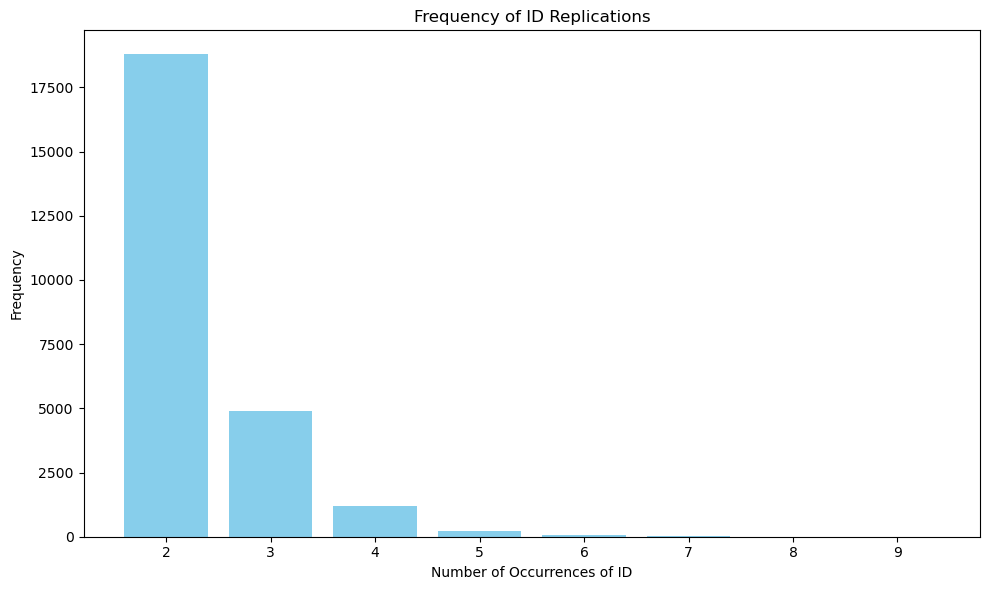

In [89]:
# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Count occurrences of each count value
count_distribution = id_counts['Count'].value_counts().reset_index()
count_distribution.columns = ['Occurrences', 'Frequency']

# Filter for occurrences greater than 1 (indicating replication)
replication_counts = count_distribution[count_distribution['Occurrences'] > 1]

# Create a bar plot to show count distribution of replications
plt.figure(figsize=(10, 6))
plt.bar(replication_counts['Occurrences'], replication_counts['Frequency'], color='skyblue')
plt.xlabel('Number of Occurrences of ID')
plt.ylabel('Frequency')
plt.title('Frequency of ID Replications')
plt.tight_layout()
plt.show()

In [90]:
import plotly.express as px

# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Count occurrences of each count value
count_distribution = id_counts['Count'].value_counts().reset_index()
count_distribution.columns = ['Occurrences', 'Frequency']

# Filter for occurrences greater than 1 (indicating replication)
replication_counts = count_distribution[count_distribution['Occurrences'] > 0]

# Create an interactive bar plot with plotly
fig = px.bar(replication_counts, x='Occurrences', y='Frequency',
             labels={'Occurrences': 'Number of Items bought together', 'Frequency': 'Frequency'},
             title='Frequency of Number of items bought at one transaction',
            # template='plotly_dark'
            )

# Show the plot
fig.show()

In [91]:
import plotly.express as px

# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Count occurrences of each count value
count_distribution = id_counts['Count'].value_counts(normalize=True).reset_index()
count_distribution.columns = ['Occurrences', 'Percentage']

# Filter for occurrences greater than 1 (indicating replication)
replication_counts = count_distribution[count_distribution['Occurrences'] > 0]

# Convert percentage to actual percentage format
replication_counts['Percentage'] = replication_counts['Percentage'] * 100

# Create an interactive bar plot with plotly
fig = px.bar(replication_counts, x='Occurrences', y='Percentage',
             labels={'Occurrences': 'Number of Items bought together', 'Percentage': 'Percentage'},
             title='Number of items bought at one transaction - in percentage',
             # template='plotly_dark'
            )

# Show the plot
fig.show()

In [92]:
# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Filter 'ID's that appear more than 10 times
high_frequency_ids = id_counts[id_counts['Count'] > 10]
print(high_frequency_ids)

Empty DataFrame
Columns: [ID, Count]
Index: []


# 3. Customer analysis

In [93]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [94]:
# Calculate age
current_year = datetime.now().year
transactions_df['age'] = current_year - transactions_df['birthdate'].dt.year

# Create age groups
bins = [0, 18, 29, 39, 49, 59, 100] 
labels = ['0-18', '19-29', '30-39', '40-49', '50-59','60+']
transactions_df['age_group'] = pd.cut(transactions_df['age'], bins=bins, labels=labels, right=False)

In [95]:
# Group by age group and gender, and count the number of orders in each group
segmented_df = transactions_df.groupby(['age_group', 'gender'])['order'].count().reset_index(name='order_count')

# Display the result
print(segmented_df)

   age_group  gender  order_count
0       0-18     0.0            0
1       0-18     1.0            0
2      19-29     0.0         2729
3      19-29     1.0         3767
4      30-39     0.0         4713
5      30-39     1.0         6950
6      40-49     0.0         3503
7      40-49     1.0         4916
8      50-59     0.0         3077
9      50-59     1.0         3999
10       60+     0.0         5456
11       60+     1.0         5899


In [96]:
df_items = transactions_df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female', 2: 'Unknown'})

# Group by age group and gender, and sum the quantity of items in each group
items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].sum().reset_index(name='item_count')

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(items_by_group, x='item_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': sorted(items_by_group['age_group'].unique())},
             labels={'item_count': 'Item Count', 'age_group': 'Age Group'})

# Set chart title
fig.update_layout(title='Item Count by Age Group and Gender')

# Show the plot
fig.show()

In [97]:
df_items = transactions_df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female', 2: 'Unknown'})

# Group by age group and gender, and calculate the average quantity of items in each group
avg_items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].mean().reset_index(name='avg_item_count')

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(avg_items_by_group, x='avg_item_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': sorted(avg_items_by_group['age_group'].unique())},
             labels={'avg_item_count': 'Average Item Count', 'age_group': 'Age Group'})

# Set chart title
fig.update_layout(title='Average Item Count by Age Group and Gender')

# Show the plot
fig.show()

## 3.1.Customer analysis based on genders - dropping all rows where gender is unknown

In [98]:
# Drop rows with NaN values
gender_df = transactions_df.copy()
gender_df = gender_df.dropna()
gender_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
4    4       2022-04-27 1900-01-01 08:48:32                8        42   
5    5       2022-04-27 1900-01-01 09:21:40                8        45   
6    6       2022-04-27 1900-01-01 08:17:41                8        45   
7    7       2022-04-27 1900-01-01 08:50:42                8        42   
21  19       2022-04-27 1900-01-01 10:39:57                8        15   

    customer_id  instore_y/n  order  line_item_id  product_id  ...  \
4          8232            1      4             0          27  ...   
5          8223            1      5             0          24  ...   
6          8335            0      6             0          47  ...   
7          8100            0      7             0          57  ...   
21         8429            1     19             0          29  ...   

    promo_item_y/n  Hours  home_store  customer_since  birthdate  gender  \
4                0      8         8.0      2018-01-24 1974-03-20     0.0   
5                0      9         8.0      2017-03-27 1970-05-17     0.0   
6                0      8         8.0      2018-02-21 1966-01-10     0.0   
7                0      8         8.0      2019-01-26 1968-03-17     1.0   
21               0     10         8.0      2018-06-06 1992-09-02     0.0   

   birth_year day_of_week   age  age_group  
4      1974.0   Wednesday  50.0      50-59  
5      1970.0   Wednesday  54.0      50-59  
6      1966.0   Wednesday  58.0      50-59  
7      1968.0   Wednesday  56.0      50-59  
21     1992.0   Wednesday  32.0      30-39  

[5 rows x 23 columns]

In [99]:
gender_df['gender'].unique()

array([0., 1.])

In [100]:
columns_to_drop = ['Hours', 'day_of_week', 'sales_outlet_id', 'staff_id', 'home_store', 'birthdate','line_item_id', 'line_item_amount', 'unit_price']

gender_df = gender_df.drop(columns=columns_to_drop)

In [101]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45009 entries, 4 to 105003
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                45009 non-null  int64         
 1   transaction_date  45009 non-null  datetime64[ns]
 2   transaction_time  45009 non-null  datetime64[ns]
 3   customer_id       45009 non-null  int64         
 4   instore_y/n       45009 non-null  int64         
 5   order             45009 non-null  int64         
 6   product_id        45009 non-null  int64         
 7   quantity          45009 non-null  int64         
 8   promo_item_y/n    45009 non-null  int64         
 9   customer_since    45009 non-null  datetime64[ns]
 10  gender            45009 non-null  float64       
 11  birth_year        45009 non-null  float64       
 12  age               45009 non-null  float64       
 13  age_group         45009 non-null  category      
dtypes: category(1), datet

In [102]:
# Calculating age at the time of becoming a customer in the DataFrame
gender_df['age_at_first_purchase'] = gender_df['customer_since'].dt.year - gender_df['birth_year']
gender_df.head()

ID transaction_date    transaction_time  customer_id  instore_y/n  order  \
4    4       2022-04-27 1900-01-01 08:48:32         8232            1      4   
5    5       2022-04-27 1900-01-01 09:21:40         8223            1      5   
6    6       2022-04-27 1900-01-01 08:17:41         8335            0      6   
7    7       2022-04-27 1900-01-01 08:50:42         8100            0      7   
21  19       2022-04-27 1900-01-01 10:39:57         8429            1     19   

    product_id  quantity  promo_item_y/n customer_since  gender  birth_year  \
4           27         1               0     2018-01-24     0.0      1974.0   
5           24         1               0     2017-03-27     0.0      1970.0   
6           47         2               0     2018-02-21     0.0      1966.0   
7           57         1               0     2019-01-26     1.0      1968.0   
21          29         2               0     2018-06-06     0.0      1992.0   

     age age_group  age_at_first_purchase  
4   50.0     50-59                   44.0  
5   54.0     50-59                   47.0  
6   58.0     50-59                   52.0  
7   56.0     50-59                   51.0  
21  32.0     30-39                   26.0

In [103]:
# Binning ages into specified intervals and creating a new column
bins = [0, 19, 29, 39, 49, 59, float('inf')]
labels = ['0-18', '19-29', '30-39', '40-49', '50-59','60+']

gender_df['age_at_first_purchase_group'] = pd.cut(gender_df['age_at_first_purchase'], bins=bins, labels=labels)

# Displaying the updated DataFrame
gender_df.head()

ID transaction_date    transaction_time  customer_id  instore_y/n  order  \
4    4       2022-04-27 1900-01-01 08:48:32         8232            1      4   
5    5       2022-04-27 1900-01-01 09:21:40         8223            1      5   
6    6       2022-04-27 1900-01-01 08:17:41         8335            0      6   
7    7       2022-04-27 1900-01-01 08:50:42         8100            0      7   
21  19       2022-04-27 1900-01-01 10:39:57         8429            1     19   

    product_id  quantity  promo_item_y/n customer_since  gender  birth_year  \
4           27         1               0     2018-01-24     0.0      1974.0   
5           24         1               0     2017-03-27     0.0      1970.0   
6           47         2               0     2018-02-21     0.0      1966.0   
7           57         1               0     2019-01-26     1.0      1968.0   
21          29         2               0     2018-06-06     0.0      1992.0   

     age age_group  age_at_first_purchase age_at_first_purchase_group  
4   50.0     50-59                   44.0                       40-49  
5   54.0     50-59                   47.0                       40-49  
6   58.0     50-59                   52.0                       50-59  
7   56.0     50-59                   51.0                       50-59  
21  32.0     30-39                   26.0                       19-29

### Checking correlation between current age (group), age whe becoming first customer (goup) and gender

In [104]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Transform 'age_group' and 'age_at_first_purchase_group' columns
new_df = pd.DataFrame()
new_df['gender'] = gender_df['gender']
new_df['age_group_number'] = label_encoder.fit_transform(gender_df['age_group'].astype(str))
new_df['age_at_first_purchase_group_number'] = label_encoder.fit_transform(gender_df['age_at_first_purchase_group'].astype(str))
new_df.head()

gender  age_group_number  age_at_first_purchase_group_number
4      0.0                 3                                   3
5      0.0                 3                                   3
6      0.0                 3                                   4
7      1.0                 3                                   4
21     0.0                 1                                   1

In [105]:
new_df.corr()

gender  age_group_number  \
gender                              1.000000         -0.050785   
age_group_number                   -0.050785          1.000000   
age_at_first_purchase_group_number -0.050807          0.945881   

                                    age_at_first_purchase_group_number  
gender                                                       -0.050807  
age_group_number                                              0.945881  
age_at_first_purchase_group_number                            1.000000

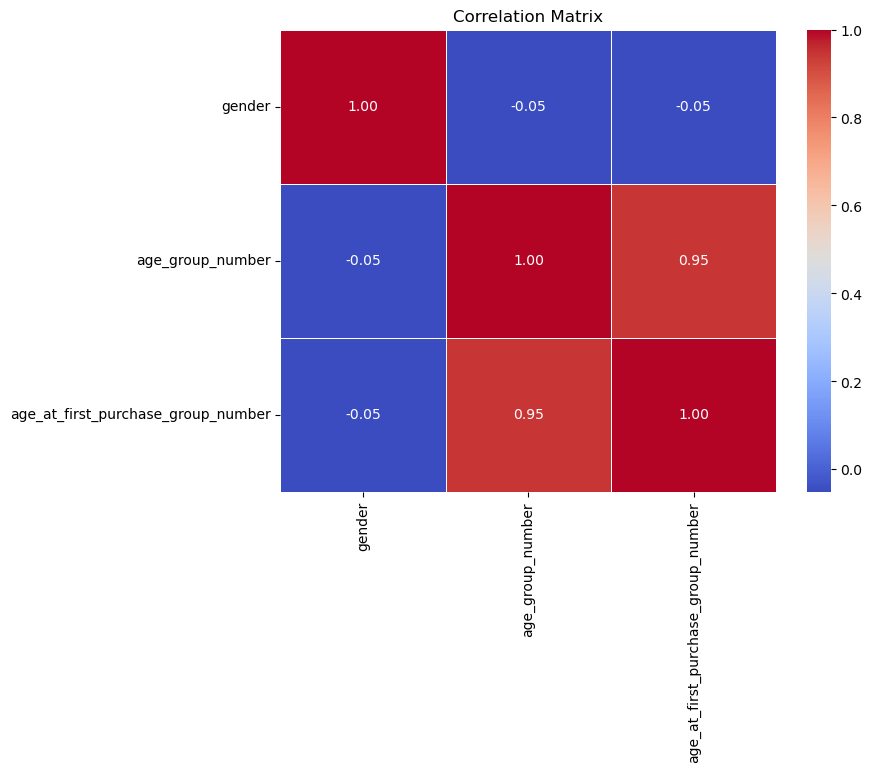

In [106]:
correlation_matrix = new_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

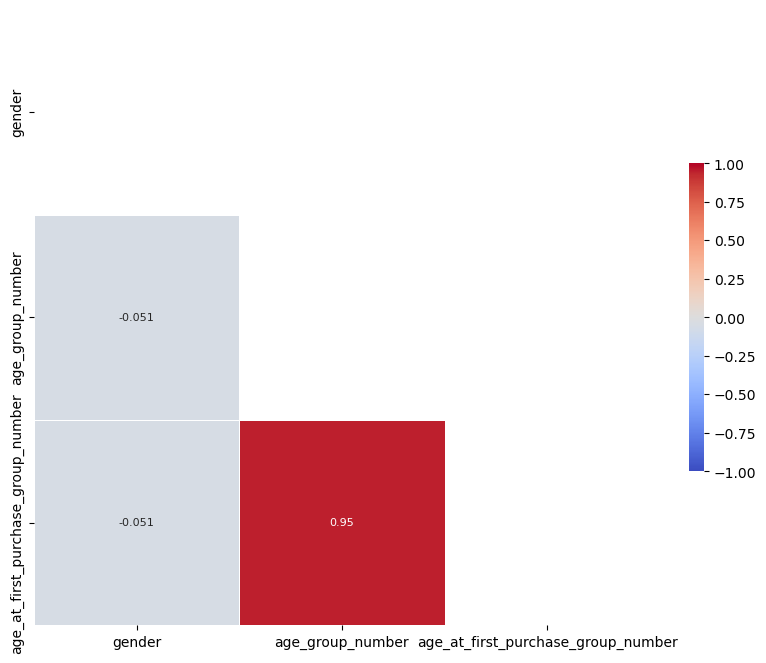

In [107]:
# plot heatmap
corrmat = new_df.corr()
# set mask for upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# set hot-cold colour scheme
cmap = 'coolwarm'

# plot graph
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square = True, mask=mask, cmap=cmap,
            vmax=1, vmin=-1, center=0,
            annot = True, annot_kws = {'size': 8},
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

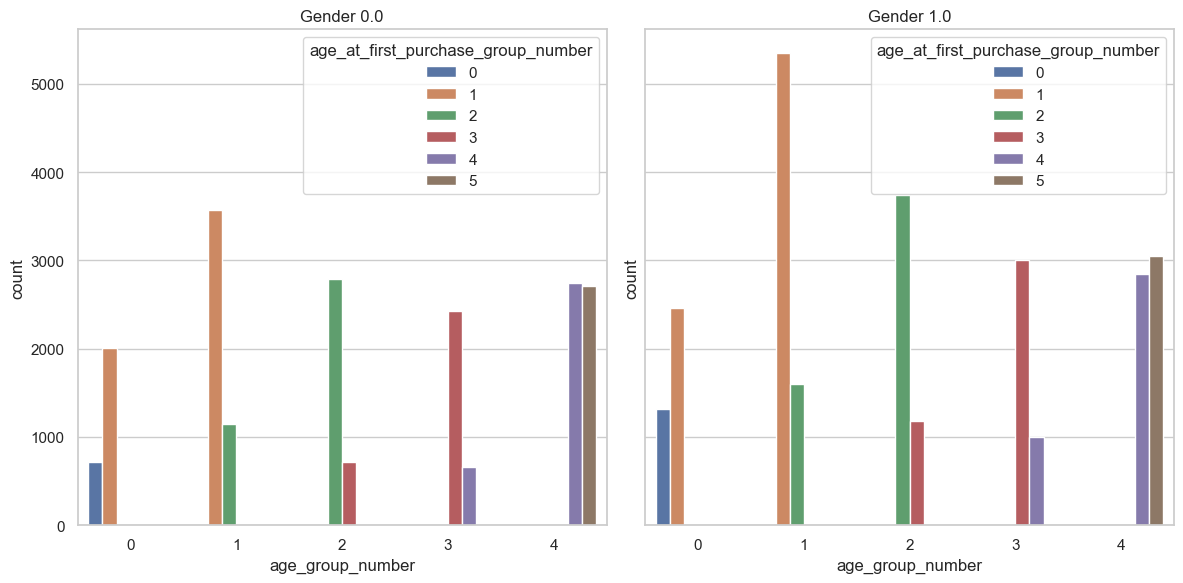

In [108]:
filtered_groups = new_df.dropna(subset=['gender'])

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each gender
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot for gender 0.0 - Male
sns.countplot(x='age_group_number', hue='age_at_first_purchase_group_number', data=filtered_groups[filtered_groups['gender'] == 0.0], ax=axes[0])
axes[0].set_title('Gender 0.0')

# Plot for gender 1.0 - Female
sns.countplot(x='age_group_number', hue='age_at_first_purchase_group_number', data=filtered_groups[filtered_groups['gender'] == 1.0], ax=axes[1])
axes[1].set_title('Gender 1.0')

# Layout
plt.tight_layout()

# Show the plots
plt.show()

### 3.2. Female

In [109]:
# Select rows where 'gender' column equals 1
Female = gender_df[gender_df['gender'] == 1]
Female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 7 to 104977
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           25531 non-null  int64         
 1   transaction_date             25531 non-null  datetime64[ns]
 2   transaction_time             25531 non-null  datetime64[ns]
 3   customer_id                  25531 non-null  int64         
 4   instore_y/n                  25531 non-null  int64         
 5   order                        25531 non-null  int64         
 6   product_id                   25531 non-null  int64         
 7   quantity                     25531 non-null  int64         
 8   promo_item_y/n               25531 non-null  int64         
 9   customer_since               25531 non-null  datetime64[ns]
 10  gender                       25531 non-null  float64       
 11  birth_year                   25531 non-n

In [110]:
Female.head()

ID transaction_date    transaction_time  customer_id  instore_y/n  order  \
7    7       2022-04-27 1900-01-01 08:50:42         8100            0      7   
22  20       2022-04-27 1900-01-01 10:07:20         8178            1     20   
23  21       2022-04-27 1900-01-01 08:33:47         8055            0     21   
29  26       2022-04-27 1900-01-01 10:24:12         8363            0     26   
39  35       2022-04-27 1900-01-01 09:51:03         8445            1     35   

    product_id  quantity  promo_item_y/n customer_since  gender  birth_year  \
7           57         1               0     2019-01-26     1.0      1968.0   
22          54         2               0     2017-01-09     1.0      1998.0   
23          43         1               0     2018-04-21     1.0      1985.0   
29          28         2               0     2019-03-30     1.0      1973.0   
39          42         2               0     2018-04-29     1.0      1992.0   

     age age_group  age_at_first_purchase age_at_first_purchase_group  
7   56.0     50-59                   51.0                       50-59  
22  26.0     19-29                   19.0                        0-18  
23  39.0     40-49                   33.0                       30-39  
29  51.0     50-59                   46.0                       40-49  
39  32.0     30-39                   26.0                       19-29

### How old were female customer when first order/signed in

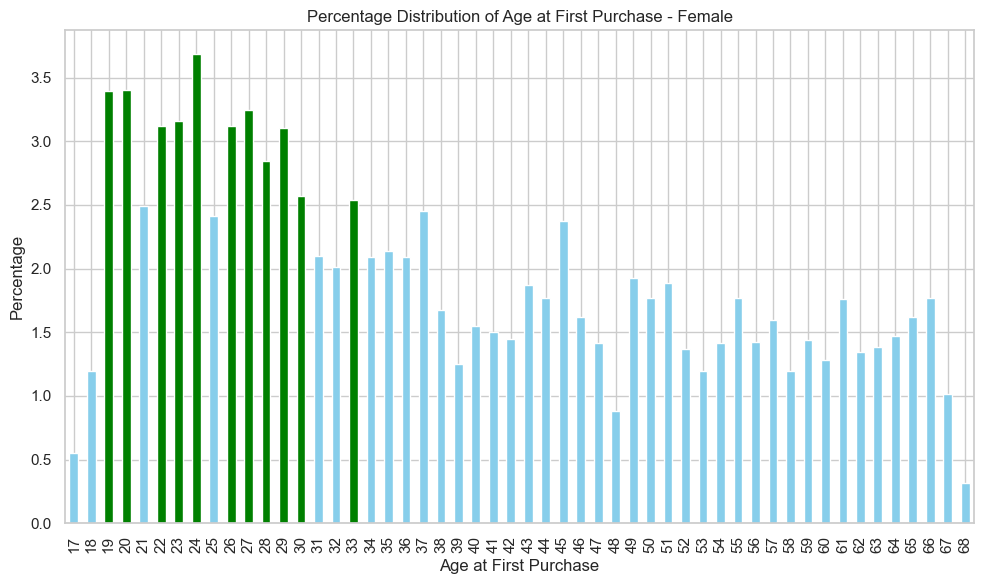

In [111]:
# Convert 'age_at_first_purchase' to integers
Female['age_at_first_purchase'] = Female['age_at_first_purchase'].astype(int)

# Calculate age percentages
age_percentage = Female['age_at_first_purchase'].value_counts(normalize=True).sort_index() * 100

# Plotting the sorted percentage distribution
plt.figure(figsize=(10, 6))

# Highlight bars with percentages greater than or equal to 2.5 in green
age_percentage.plot(kind='bar', color=['green' if percentage >= 2.5 else 'skyblue' for percentage in age_percentage])

plt.xlabel('Age at First Purchase')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Age at First Purchase - Female')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [112]:
# Calculating counts for each age group
age_group_counts = Female['age_group'].value_counts().reset_index()
age_group_counts.columns = ['age_group', 'count']

# Adding a percentage column and rounding to 2 decimal places
total_count = age_group_counts['count'].sum()
age_group_counts['percentage'] = round((age_group_counts['count'] / total_count) * 100, 2)

# Sorting the DataFrame by age_group column
age_group_counts = age_group_counts.sort_values(by='age_group')

# Displaying the resulting DataFrame
print(age_group_counts)

  age_group  count  percentage
5      0-18      0        0.00
4     19-29   3767       14.75
0     30-39   6950       27.22
2     40-49   4916       19.26
3     50-59   3999       15.66
1       60+   5899       23.11


In [113]:
# Convert interval data to string for visualization
age_group_counts['age_group'] = age_group_counts['age_group'].astype(str)

fig = px.bar(age_group_counts, x='age_group', y='percentage', text='percentage',
             labels={'percentage': 'Percentage'},
             title='Percentage Distribution of Age Groups - Female',
             color='percentage',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(xaxis_title='Age Group',
                  yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(transition_duration=500)

fig.show()

### Checking how many items per transaction are for each age group

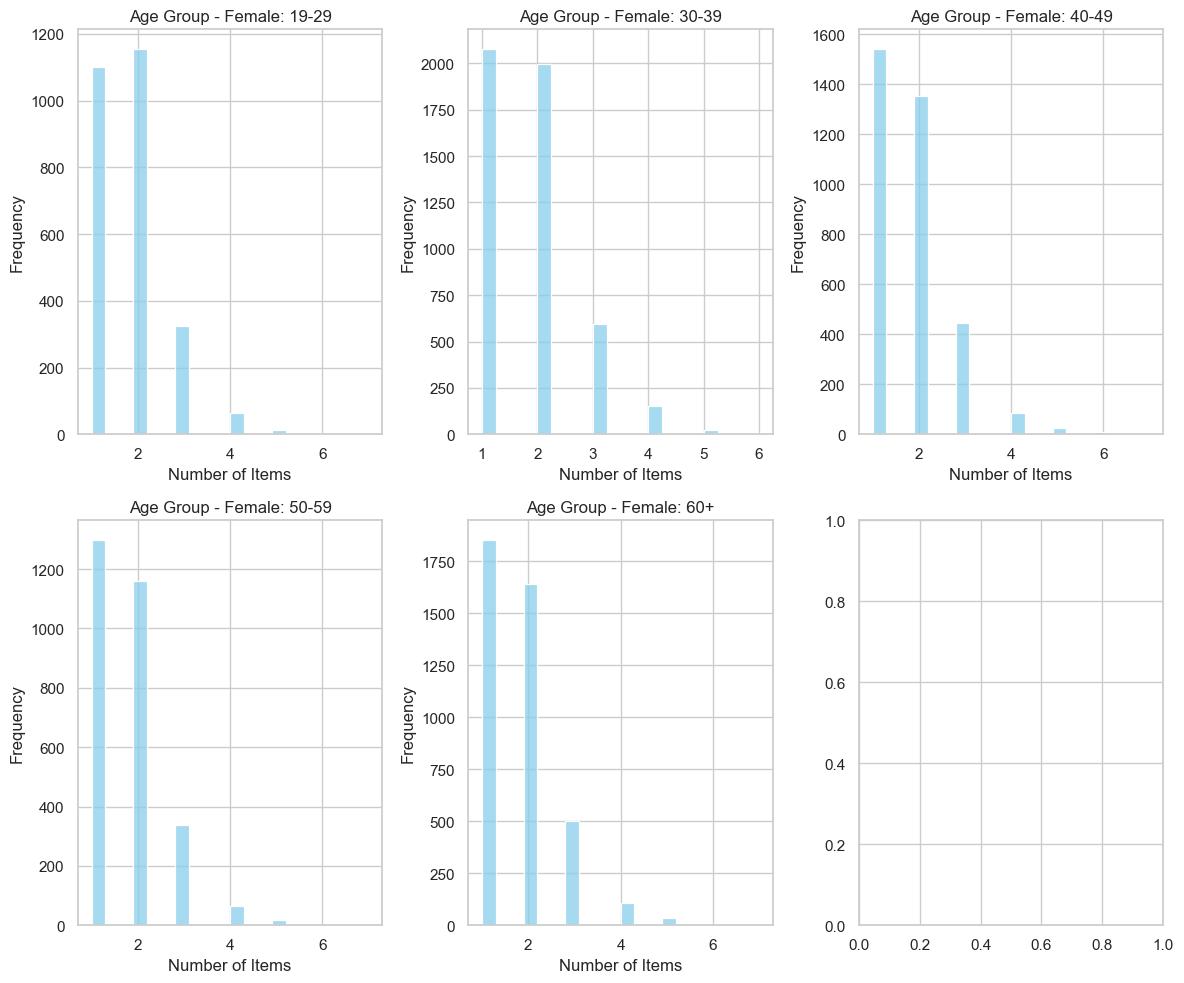

In [114]:
# Set the style of the plots
sns.set_style('whitegrid')

# Create a custom sorting order for age groups
custom_order = ['0-18', '19-29', '30-39', '40-49', '50-59', '60+']

# Get unique age groups in the custom order
age_groups = Female['age_group'].unique()
age_groups_sorted = sorted(age_groups, key=lambda x: custom_order.index(x))

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(age_groups_sorted) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for i, age_group in enumerate(age_groups_sorted):
    
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Calculate subplot position
    row = i // n_cols
    col = i % n_cols
    
    # Plot the histogram without the kernel density estimate line
    sns.histplot(items_per_transaction, bins=20, kde=False, color='skyblue', ax=axes[row, col])
    
    # Set plot title and labels
    axes[row, col].set_title(f'Age Group - Female: {age_group}')
    axes[row, col].set_xlabel('Number of Items')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [115]:
# Get unique age groups and sort them
age_groups = sorted(Female['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups):
    
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Create histogram for each age group
    hist = go.Histogram(x=items_per_transaction, nbinsx=20, name=f"Age Group: {age_group}")
    
    # Add histogram to the subplot
    fig.add_trace(hist, row=i+1, col=1)

# Set layout and display plot
fig.update_layout(height=800, showlegend=False)
fig.show()

In [116]:
# Get unique age groups and sort them
age_groups = sorted(Female['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups):
    
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Create histogram for each age group
    hist = go.Histogram(x=items_per_transaction, nbinsx=20, name=f"Age Group: {age_group}")
    
    # Add histogram to the subplot
    fig.add_trace(hist, row=i+1, col=1)

    
    
# Set layout
fig.update_layout(height=800, showlegend=False, title_text="Items per transaction by age group - Female")

# Update axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups), col=1)


# Show the plot
fig.show()

In [117]:
age_groups = sorted(Female['age_group'].unique())

age_group_results = []

for age_group in age_groups:
    age_group_data = Female[Female['age_group'] == age_group]
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    item_counts = items_per_transaction.value_counts(normalize=True).reset_index()
    item_counts.columns = ['items', 'percentage']
    item_counts['age_group'] = age_group
    
    age_group_results.append(item_counts)

# Combine results for all age groups into a single DataFrame
result_df = pd.concat(age_group_results, ignore_index=True)
result_df['percentage'] = (result_df['percentage'] * 100).apply(lambda x: f'{x:.0f}%')

# Show the DataFrame with the results
result_df.head()

items percentage age_group
0      2        43%     19-29
1      1        41%     19-29
2      3        12%     19-29
3      4         2%     19-29
4      5         0%     19-29

In [118]:
# Sorting age groups
age_groups = sorted(result_df['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups, 1):
    # Filter the data for the specific age group
    age_group_data = result_df[result_df['age_group'] == age_group]
    
    # Convert percentage to numeric
    age_group_data['percentage'] = age_group_data['percentage'].str.rstrip('%').astype(float)
    
    # Create bar chart for each age group
    bar_chart = go.Bar(x=age_group_data['items'], y=age_group_data['percentage'], name=f"Age Group: {age_group}")
    
    # Add bar chart to the subplot
    fig.add_trace(bar_chart, row=i, col=1)
    

# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Items per Transaction Percentage by Age Group - Female")

# Set axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups), col=1)

# Show plot
fig.show()

# Male

In [119]:
# Select rows where 'gender' column equals 0
Male = gender_df[gender_df['gender'] == 0]
Male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19478 entries, 4 to 105003
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           19478 non-null  int64         
 1   transaction_date             19478 non-null  datetime64[ns]
 2   transaction_time             19478 non-null  datetime64[ns]
 3   customer_id                  19478 non-null  int64         
 4   instore_y/n                  19478 non-null  int64         
 5   order                        19478 non-null  int64         
 6   product_id                   19478 non-null  int64         
 7   quantity                     19478 non-null  int64         
 8   promo_item_y/n               19478 non-null  int64         
 9   customer_since               19478 non-null  datetime64[ns]
 10  gender                       19478 non-null  float64       
 11  birth_year                   19478 non-n

In [120]:
# Calculating counts for each age group
age_group_counts_M = Male['age_group'].value_counts().reset_index()
age_group_counts_M.columns = ['age_group', 'count']

# Adding a percentage column and rounding to 2 decimal places
total_count = age_group_counts_M['count'].sum()
age_group_counts_M['percentage'] = round((age_group_counts_M['count'] / total_count) * 100, 2)

# Sorting the DataFrame by age_group column
age_group_counts_M = age_group_counts_M.sort_values(by='age_group')

# Displaying the resulting DataFrame
print(age_group_counts_M)

  age_group  count  percentage
5      0-18      0        0.00
4     19-29   2729       14.01
1     30-39   4713       24.20
2     40-49   3503       17.98
3     50-59   3077       15.80
0       60+   5456       28.01


In [121]:
# Convert interval data to string for visualization
age_group_counts_M['age_group'] = age_group_counts_M['age_group'].astype(str)

fig = px.bar(age_group_counts_M, x='age_group', y='percentage', text='percentage',
             labels={'percentage': 'Percentage'},
             title='Percentage Distribution of Age Groups - Male',
             color='percentage',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(xaxis_title='Age Group',
                  yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(transition_duration=500)

fig.show()

# How old were man when first order

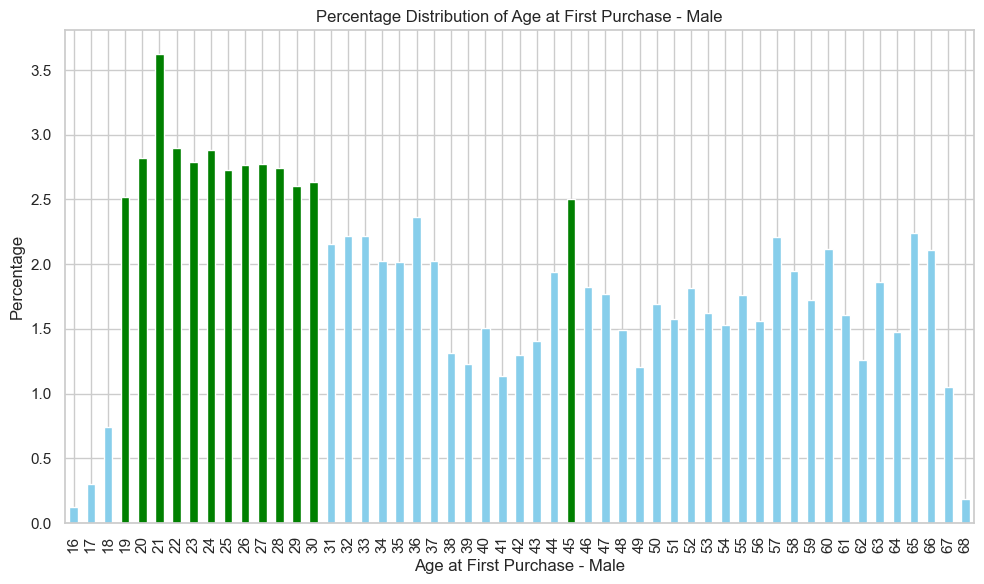

In [122]:
# Convert 'age_at_first_purchase' to integers
Male['age_at_first_purchase'] = Male['age_at_first_purchase'].astype(int)

# Calculate age percentages
age_percentage = Male['age_at_first_purchase'].value_counts(normalize=True).sort_index() * 100

# Plotting the sorted percentage distribution
plt.figure(figsize=(10, 6))

# Highlight bars with percentages greater than or equal to 2.5 in green
age_percentage.plot(kind='bar', color=['green' if percentage >= 2.5 else 'skyblue' for percentage in age_percentage])

plt.xlabel('Age at First Purchase - Male')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Age at First Purchase - Male')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### How many items are per transaction for each age group - Male

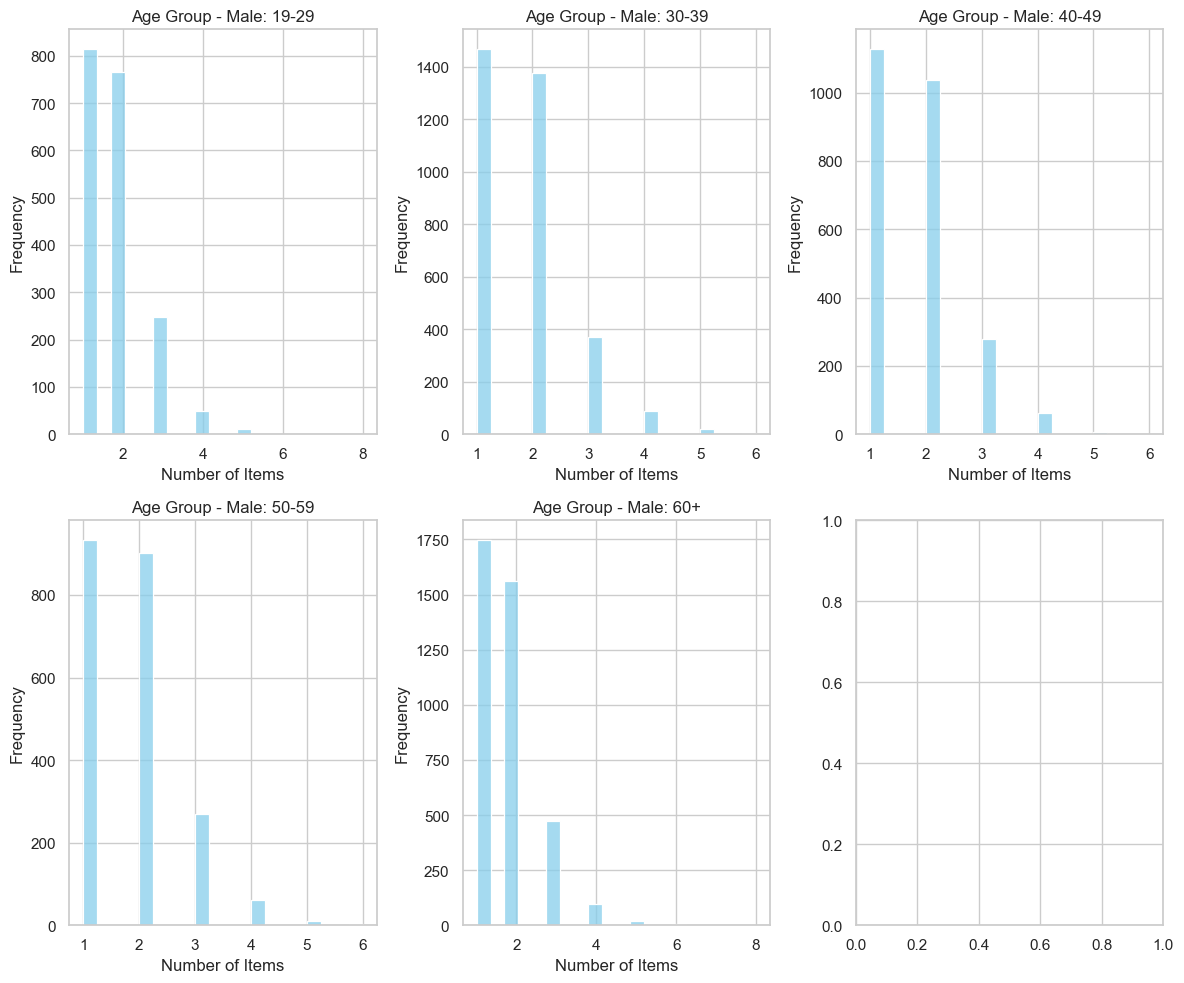

In [123]:
# Set the style of the plots
sns.set_style('whitegrid')

# Create a custom sorting order for age groups
custom_order = ['0-18', '19-29', '30-39', '40-49', '50-59', '60+']

# Get unique age groups in the custom order
age_groups = Male['age_group'].unique()
age_groups_sorted = sorted(age_groups, key=lambda x: custom_order.index(x))

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(age_groups_sorted) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for i, age_group in enumerate(age_groups_sorted):
    
    # Filter the data for the specific age group
    age_group_data = Male[Male['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Calculate subplot position
    row = i // n_cols
    col = i % n_cols
    
    # Plot the histogram without the kernel density estimate line
    sns.histplot(items_per_transaction, bins=20, kde=False, color='skyblue', ax=axes[row, col])
    
    # Set plot title and labels
    axes[row, col].set_title(f'Age Group - Male: {age_group}')
    axes[row, col].set_xlabel('Number of Items')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [124]:
age_groups_M = sorted(Male['age_group'].unique())

age_group_results_M = []

for age_group_M in age_groups_M:
    age_group_data_M = Male[Male['age_group'] == age_group_M]
    items_per_transaction_M = age_group_data_M.groupby('ID')['quantity'].sum()
    
    item_counts_M = items_per_transaction_M.value_counts(normalize=True).reset_index()
    item_counts_M.columns = ['items', 'percentage']
    item_counts_M['age_group'] = age_group_M
    
    age_group_results_M.append(item_counts_M)

# Combine results for all age groups into a single DataFrame
result_df_M = pd.concat(age_group_results_M, ignore_index=True)
result_df_M['percentage'] = (result_df_M['percentage'] * 100).apply(lambda x: f'{x:.0f}%')

# Show the DataFrame with the results
print(result_df_M)

    items percentage age_group
0       1        43%     19-29
1       2        40%     19-29
2       3        13%     19-29
3       4         3%     19-29
4       5         1%     19-29
5       8         0%     19-29
6       6         0%     19-29
7       7         0%     19-29
8       1        44%     30-39
9       2        41%     30-39
10      3        11%     30-39
11      4         3%     30-39
12      5         1%     30-39
13      6         0%     30-39
14      1        45%     40-49
15      2        41%     40-49
16      3        11%     40-49
17      4         2%     40-49
18      5         0%     40-49
19      6         0%     40-49
20      1        43%     50-59
21      2        41%     50-59
22      3        12%     50-59
23      4         3%     50-59
24      5         0%     50-59
25      6         0%     50-59
26      1        45%       60+
27      2        40%       60+
28      3        12%       60+
29      4         2%       60+
30      5         0%       60+
31      

In [125]:
# Sorting age groups
age_group_M = sorted(result_df_M['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups_M), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group_M in enumerate(age_groups_M, 1):
    
    # Filter the data for the specific age group
    age_group_data_M = result_df_M[result_df_M['age_group'] == age_group_M]
    
    # Convert percentage to numeric
    age_group_data_M['percentage'] = age_group_data_M['percentage'].str.rstrip('%').astype(float)
    
    # Create bar chart for each age group
    bar_chart = go.Bar(x=age_group_data_M['items'], y=age_group_data_M['percentage'], name=f"Age Group: {age_group}")
    
    # Add bar chart to the subplot
    fig.add_trace(bar_chart, row=i, col=1)
    

# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Items per Transaction Percentage by Age Group - Male")

# Set axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups_M), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups_M), col=1)

# Show plot
fig.show()

In [126]:
Male_groups = Male.copy()
Male_groups['age_group_number'] = label_encoder.fit_transform(Male_groups['age_group'].astype(str))
Male_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19478 entries, 4 to 105003
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           19478 non-null  int64         
 1   transaction_date             19478 non-null  datetime64[ns]
 2   transaction_time             19478 non-null  datetime64[ns]
 3   customer_id                  19478 non-null  int64         
 4   instore_y/n                  19478 non-null  int64         
 5   order                        19478 non-null  int64         
 6   product_id                   19478 non-null  int64         
 7   quantity                     19478 non-null  int64         
 8   promo_item_y/n               19478 non-null  int64         
 9   customer_since               19478 non-null  datetime64[ns]
 10  gender                       19478 non-null  float64       
 11  birth_year                   19478 non-n

In [127]:
Male_groups['age_group_number'] = Male_groups['age_group'].cat.codes

# Print the unique numerical codes assigned to each category
print(Male_groups['age_group_number'].unique())

[4 2 1 5 3]


# Product

In [128]:
# Loading product information data
df3 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\product.csv")
df3.head()

product_id    product_group product_category       product_type  \
0           1  Whole Bean/Teas     Coffee beans      Organic Beans   
1           2  Whole Bean/Teas     Coffee beans  House blend Beans   
2           3  Whole Bean/Teas     Coffee beans     Espresso Beans   
3           4  Whole Bean/Teas     Coffee beans     Espresso Beans   
4           5  Whole Bean/Teas     Coffee beans      Gourmet Beans   

               product_name  \
0       Brazilian - Organic   
1  Our Old Time Diner Blend   
2            Espresso Roast   
3      Primo Espresso Roast   
4    Columbian Medium Roast   

                                 product_description unit_of_measure  \
0     It's like Carnival in a cup. Clean and smooth.           12 oz   
1  Out packed blend of beans that is reminiscent ...           12 oz   
2          Our house blend for a good espresso shot.            1 lb   
3   Our primium single source of hand roasted beans.            1 lb   
4           A smooth cup of coffee any time of day.             1 lb   

   current_wholesale_price current_retail_price  tax_exempt_yn  promo_yn  \
0                    14.40              $18.00               1         0   
1                    14.40              $18.00               1         0   
2                    11.80              $14.75               1         0   
3                    16.36              $20.45               1         0   
4                    12.00              $15.00               1         0   

   new_product_yn  
0               0  
1               0  
2               0  
3               0  
4               0

In [129]:
columns_to_drop = ['product_group','product_type','product_description','unit_of_measure','current_wholesale_price','current_retail_price',
                  'tax_exempt_yn','promo_yn','new_product_yn']

df3 = df3.drop(columns=columns_to_drop)
df3.head()

product_id product_category              product_name
0           1     Coffee beans       Brazilian - Organic
1           2     Coffee beans  Our Old Time Diner Blend
2           3     Coffee beans            Espresso Roast
3           4     Coffee beans      Primo Espresso Roast
4           5     Coffee beans    Columbian Medium Roast

In [130]:
# Function to replace numeric values with corresponding text from df3
def replace_with_text(value):
    product_name = df3.loc[df3['product_id'] == value, 'product_name'].values
    if len(product_name) > 0:
        return product_name[0]
    else:
        return value

# Market Basket Analysis

In [131]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [132]:
# Drop rows with NaN values
New_df = transactions_df.copy()
New_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  ...  \
0            0            0      1             0          38  ...   
1            0            0      1             0          84  ...   
2            0            0      2             0          51  ...   
3            0            1      3             0          33  ...   
4         8232            1      4             0          27  ...   

   promo_item_y/n  Hours  home_store  customer_since  birthdate  gender  \
0               0      9         NaN             NaT        NaT     NaN   
1               0      9         NaN             NaT        NaT     NaN   
2               0      8         NaN             NaT        NaT     NaN   
3               0      9         NaN             NaT        NaT     NaN   
4               0      8         8.0      2018-01-24 1974-03-20     0.0   

  birth_year day_of_week   age  age_group  
0        NaN   Wednesday   NaN        NaN  
1        NaN   Wednesday   NaN        NaN  
2        NaN   Wednesday   NaN        NaN  
3        NaN   Wednesday   NaN        NaN  
4     1974.0   Wednesday  50.0      50-59  

[5 rows x 23 columns]

In [133]:
# Define a mapping of age groups to numbers
age_group_mapping = {'0-18': 0, '19-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60+': 5}

# Use the map function to create the 'age_group_number' column
New_df['age_group_number'] = New_df['age_group'].map(age_group_mapping)

# Display the updated DataFrame
New_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  ...  Hours  \
0            0            0      1             0          38  ...      9   
1            0            0      1             0          84  ...      9   
2            0            0      2             0          51  ...      8   
3            0            1      3             0          33  ...      9   
4         8232            1      4             0          27  ...      8   

   home_store  customer_since  birthdate  gender  birth_year day_of_week  \
0         NaN             NaT        NaT     NaN         NaN   Wednesday   
1         NaN             NaT        NaT     NaN         NaN   Wednesday   
2         NaN             NaT        NaT     NaN         NaN   Wednesday   
3         NaN             NaT        NaT     NaN         NaN   Wednesday   
4         8.0      2018-01-24 1974-03-20     0.0      1974.0   Wednesday   

    age  age_group  age_group_number  
0   NaN        NaN               NaN  
1   NaN        NaN               NaN  
2   NaN        NaN               NaN  
3   NaN        NaN               NaN  
4  50.0      50-59                 4  

[5 rows x 24 columns]

In [134]:
New_df = New_df[['ID','transaction_date', 'customer_id', 'product_id', 'gender','age_group','age_group_number']]

In [135]:
New_df.head(50)

ID transaction_date  customer_id  product_id  gender age_group  \
0    1       2022-04-27            0          38     NaN       NaN   
1    1       2022-04-27            0          84     NaN       NaN   
2    2       2022-04-27            0          51     NaN       NaN   
3    3       2022-04-27            0          33     NaN       NaN   
4    4       2022-04-27         8232          27     0.0     50-59   
5    5       2022-04-27         8223          24     0.0     50-59   
6    6       2022-04-27         8335          47     0.0     50-59   
7    7       2022-04-27         8100          57     1.0     50-59   
8    8       2022-04-27            0          47     NaN       NaN   
9    9       2022-04-27            0          30     NaN       NaN   
10  10       2022-04-27            0          56     NaN       NaN   
11  11       2022-04-27            0          24     NaN       NaN   
12  12       2022-04-27            0          34     NaN       NaN   
13  13       2022-04-27            0          33     NaN       NaN   
14  14       2022-04-27            0          46     NaN       NaN   
15  15       2022-04-27            0          72     NaN       NaN   
16  15       2022-04-27            0          87     NaN       NaN   
17  16       2022-04-27            0          51     NaN       NaN   
18  17       2022-04-27            0          51     NaN       NaN   
19  18       2022-04-27            0          39     NaN       NaN   
20  18       2022-04-27            0          84     NaN       NaN   
21  19       2022-04-27         8429          29     0.0     30-39   
22  20       2022-04-27         8178          54     1.0     19-29   
23  21       2022-04-27         8055          43     1.0     40-49   
24  22       2022-04-27            0          57     NaN       NaN   
25  23       2022-04-27            0          45     NaN       NaN   
26  24       2022-04-27            0          37     NaN       NaN   
27  24       2022-04-27            0          84     NaN       NaN   
28  25       2022-04-27            0          33     NaN       NaN   
29  26       2022-04-27         8363          28     1.0     50-59   
30  27       2022-04-27            0          46     NaN       NaN   
31  27       2022-04-27            0          71     NaN       NaN   
32  28       2022-04-27            0          30     NaN       NaN   
33  29       2022-04-27            0          60     NaN       NaN   
34  30       2022-04-27            0          23     NaN       NaN   
35  31       2022-04-27            0          32     NaN       NaN   
36  32       2022-04-27            0          33     NaN       NaN   
37  33       2022-04-27            0          32     NaN       NaN   
38  34       2022-04-27            0          45     NaN       NaN   
39  35       2022-04-27         8445          42     1.0     30-39   
40  36       2022-04-27            0          22     NaN       NaN   
41  37       2022-04-27            0          50     NaN       NaN   
42  38       2022-04-27            0          30     NaN       NaN   
43  39       2022-04-27            0          29     NaN       NaN   
44  40       2022-04-27            0          37     NaN       NaN   
45  40       2022-04-27            0          63     NaN       NaN   
46  41       2022-04-27            0          72     NaN       NaN   
47  41       2022-04-27            0          87     NaN       NaN   
48  42       2022-04-27            0          45     NaN       NaN   
49  43       2022-04-27            0          50     NaN       NaN   

   age_group_number  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4                 4  
5                 4  
6                 4  
7                 4  
8               NaN  
9               NaN  
10              NaN  
11              NaN  
12              NaN  
13              NaN  
14              NaN  
15              NaN  
16              NaN  
17              NaN  
18             

## Drop transactions with only 1 sold product

In [136]:
# Count the occurrences of each ID in New_df
id_counts = New_df['ID'].value_counts()

# Count how many IDs have only one sold product and how many have more than one
one_product_count = id_counts[id_counts == 1].count()
more_than_one_product_count = id_counts[id_counts > 1].count()

# Display the counts
print(f"Number of IDs with only one sold product: {one_product_count}")
print(f"Number of IDs with more than one sold product: {more_than_one_product_count}")


Number of IDs with only one sold product: 46384
Number of IDs with more than one sold product: 25170


In [137]:
# Count the occurrences of each ID in New_df
id_counts = New_df['ID'].value_counts()

# Get IDs with more than 1 product sold
ids_with_more_than_one_product = id_counts[id_counts > 1].index

# Filter the DataFrame to keep only rows with IDs having more than 1 product sold
filtered_df = New_df[New_df['ID'].isin(ids_with_more_than_one_product)]

# Display the filtered DataFrame
print(filtered_df)

           ID transaction_date  customer_id  product_id  gender age_group  \
0           1       2022-04-27            0          38     NaN       NaN   
1           1       2022-04-27            0          84     NaN       NaN   
15         15       2022-04-27            0          72     NaN       NaN   
16         15       2022-04-27            0          87     NaN       NaN   
19         18       2022-04-27            0          39     NaN       NaN   
...       ...              ...          ...         ...     ...       ...   
105003  85584       2022-05-16         5095          36     0.0     50-59   
105004  85585       2022-05-13            0          62     NaN       NaN   
105005  85585       2022-05-13            0          72     NaN       NaN   
105006  85585       2022-05-13            0          87     NaN       NaN   
105007  85585       2022-05-13            0          61     NaN       NaN   

       age_group_number  
0                   NaN  
1                   NaN

In [138]:
filtered_df.head()

ID transaction_date  customer_id  product_id  gender age_group  \
0    1       2022-04-27            0          38     NaN       NaN   
1    1       2022-04-27            0          84     NaN       NaN   
15  15       2022-04-27            0          72     NaN       NaN   
16  15       2022-04-27            0          87     NaN       NaN   
19  18       2022-04-27            0          39     NaN       NaN   

   age_group_number  
0               NaN  
1               NaN  
15              NaN  
16              NaN  
19              NaN

## General MBA

In [139]:
filtered_df_general = filtered_df[['ID','transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = filtered_df_general.groupby(['ID'])['product_id'].apply(list).values.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
# min_support = 0.01 -finiging only 2 products

min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA_gen_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA_gen_dict['Product'].append(product)
        MBA_gen_dict['Related Product'].append(other_product)
        MBA_gen_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA_gen_df = pd.DataFrame(MBA_gen_dict)

# Display the new DataFrame
print(MBA_gen_df)

    Product  Related Product  Support Percentage
0        29               72            0.206595
1        31               72            0.222487
2        34               74            0.206595
3        37               63            0.437028
4        37               64            0.357569
5        37               65            0.448947
6        37               84            0.441001
7        38               63            0.441001
8        38               64            0.452920
9        38               65            0.464839
10       38               75            0.226460
11       38               84            0.377433
12       39               63            0.448947
13       39               64            0.468812
14       39               65            0.460866
15       39               84            0.484704
16       40               63            0.417163
17       40               64            0.377433
18       40               65            0.524434
19       40         

In [140]:
# Create a new DataFrame with replaced values
recomendation_df = MBA_gen_df.copy()
recomendation_df['Product'] = recomendation_df['Product'].apply(replace_with_text)
recomendation_df['Related Product'] = recomendation_df['Related Product'].apply(replace_with_text)

recomendation_df.head()

Product  Related Product  Support Percentage
0  Columbian Medium Roast Rg     Ginger Scone            0.206595
1                Ethiopia Sm     Ginger Scone            0.222487
2   Jamaican Coffee River Sm  Ginger Biscotti            0.206595
3              Espresso shot     Carmel syrup            0.437028
4              Espresso shot   Hazelnut syrup            0.357569

# MBA Female - general

In [141]:
MBA_F_df = filtered_df[filtered_df['gender'] == 1]
MBA_F_df.rename(columns={'product_id': 'Product'}, inplace=True)
MBA_F_df.head()

ID transaction_date  customer_id  Product  gender age_group  \
90    79       2022-04-27         8437       48     1.0       60+   
91    79       2022-04-27         8437       72     1.0       60+   
96    83       2022-04-27         8251       41     1.0     40-49   
97    83       2022-04-27         8251       63     1.0     40-49   
123  104       2022-04-27         8097       50     1.0     40-49   

    age_group_number  
90                 5  
91                 5  
96                 3  
97                 3  
123                3

In [142]:
MBA_F_gen_df = MBA_F_df.copy()

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_F_gen_df.groupby(['ID'])['Product'].apply(list).values.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA_F_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA_F_dict['Product'].append(product)
        MBA_F_dict['Related Product'].append(other_product)
        MBA_F_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA_F = pd.DataFrame(MBA_F_dict)

# Display the new DataFrame
print(MBA_F)

     Product  Related Product  Support Percentage
0         22               72            0.242845
1         22               73            0.242845
2         22               77            0.225499
3         23               73            0.225499
4         23               76            0.242845
..       ...              ...                 ...
217       84               40            0.450997
218       84               41            0.450997
219       87               70            0.208153
220       87               72            2.289679
221       87               74            0.225499

[222 rows x 3 columns]


In [143]:
# Create a new DataFrame with replaced values
recomendation_F_df = MBA_F.copy()
recomendation_F_df['Product'] = recomendation_F_df['Product'].apply(replace_with_text)
recomendation_F_df['Related Product'] = recomendation_F_df['Related Product'].apply(replace_with_text)

recomendation_F_df.head()

Product          Related Product  Support Percentage
0  Our Old Time Diner Blend Sm             Ginger Scone            0.242845
1  Our Old Time Diner Blend Sm         Almond Croissant            0.242845
2  Our Old Time Diner Blend Sm            Oatmeal Scone            0.225499
3  Our Old Time Diner Blend Rg         Almond Croissant            0.225499
4  Our Old Time Diner Blend Rg  Chocolate Chip Biscotti            0.242845

### Female - groups

In [144]:
MBA_F_gr = MBA_F_df.copy()
MBA_F_gr

ID transaction_date  customer_id  Product  gender age_group  \
90         79       2022-04-27         8437       48     1.0       60+   
91         79       2022-04-27         8437       72     1.0       60+   
96         83       2022-04-27         8251       41     1.0     40-49   
97         83       2022-04-27         8251       63     1.0     40-49   
123       104       2022-04-27         8097       50     1.0     40-49   
...       ...              ...          ...      ...     ...       ...   
104936  85528       2022-05-07         5290       42     1.0     40-49   
104956  85550       2022-05-26         3474       28     1.0     50-59   
104957  85550       2022-05-26         3474       58     1.0     50-59   
104969  85560       2022-05-10         5484       46     1.0     40-49   
104970  85560       2022-05-10         5484       28     1.0     40-49   

       age_group_number  
90                    5  
91                    5  
96                    3  
97                    3  
123                   3  
...                 ...  
104936                3  
104956                4  
104957                4  
104969                3  
104970                3  

[13294 rows x 7 columns]

In [145]:
from mlxtend.frequent_patterns import apriori, association_rules

all_age_group_dfs = []

# Available age group numbers: 1, 2, 3, 4, 5
for age_group_number in range(5):
    
    # Filter data for the current age group
    MBA_Female_age_group = MBA_F_gr[MBA_F_gr['age_group_number'] == age_group_number]

    # Convert DataFrame to a list of lists (transaction format)
    transactions = MBA_Female_age_group.groupby(['ID'])['Product'].apply(list).values.tolist()

    # Encode transactions for Apriori
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Apriori algorithm to find frequent itemsets
    min_support = 0.002
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Print the frequent itemsets for debugging
    print(f"Frequent Itemsets for Age Group {age_group_number}:\n{frequent_itemsets}")

    # Check if frequent_itemsets DataFrame is empty
    if frequent_itemsets.empty:
        print("No frequent itemsets found for the current age group.")
        continue

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

    # Create a dictionary to store results for the current age group
    age_group_dict = {'Age_Group_Number': [], 'Product': [], 'Related Product': [], 'Support Percentage': [], 'Confidence': []}

    # Iterate over each rule
    for _, row in rules.iterrows():
        age_group_dict['Age_Group_Number'].append(age_group_number)
        age_group_dict['Product'].append(row['consequents'])
        age_group_dict['Related Product'].append(row['antecedents'])
        age_group_dict['Support Percentage'].append(row['support'] * 100)
        age_group_dict['Confidence'].append(row['confidence'] * 100)

    # Convert the dictionary to a DataFrame for the current age group
    age_group_df = pd.DataFrame(age_group_dict)

    # Append the DataFrame to the list
    all_age_group_dfs.append(age_group_df)

# Concatenate all DataFrames into a single DataFrame
all_age_group_results_F = pd.concat(all_age_group_dfs, ignore_index=True)

# Display the consolidated results
print(all_age_group_results_F)

Frequent Itemsets for Age Group 0:
Empty DataFrame
Columns: [support, itemsets]
Index: []
No frequent itemsets found for the current age group.
Frequent Itemsets for Age Group 1:
      support      itemsets
0    0.002312           (5)
1    0.002312           (6)
2    0.004624           (9)
3    0.006936          (13)
4    0.002312          (14)
..        ...           ...
401  0.002312      (79, 87)
402  0.002312  (51, 45, 22)
403  0.002312  (60, 37, 30)
404  0.002312  (40, 65, 75)
405  0.002312  (40, 74, 84)

[406 rows x 2 columns]
Frequent Itemsets for Age Group 2:
      support      itemsets
0    0.002525           (5)
1    0.003788           (6)
2    0.003788           (8)
3    0.004419           (9)
4    0.003788          (10)
..        ...           ...
221  0.025884      (72, 87)
222  0.003157      (73, 87)
223  0.002525      (74, 87)
224  0.002525      (85, 78)
225  0.002525  (72, 69, 87)

[226 rows x 2 columns]
Frequent Itemsets for Age Group 3:
      support  itemsets
0    0.

In [146]:
# Convert 'Product' and 'Related Product' columns to integers
all_age_group_results_F['Product'] = all_age_group_results_F['Product'].apply(lambda x: next(iter(x)))
all_age_group_results_F['Related Product'] = all_age_group_results_F['Related Product'].apply(lambda x: next(iter(x)))
all_age_group_results_F['Product'] = all_age_group_results_F['Product'].astype(int)
all_age_group_results_F['Related Product'] = all_age_group_results_F['Related Product'].astype(int)

In [147]:
all_age_group_results_F.head()

Age_Group_Number  Product  Related Product  Support Percentage  Confidence
0                 1       69               13            0.231214   33.333333
1                 1       40               65            0.693642   30.000000
2                 1       41               84            0.924855   33.333333
3                 1       87               72            2.312139   35.714286
4                 1       72               87            2.312139   50.000000

In [148]:
# Create a new DataFrame with replaced values
recomendation_F_gr_df = all_age_group_results_F.copy()
recomendation_F_gr_df['Product'] = recomendation_F_gr_df['Product'].apply(replace_with_text)
recomendation_F_gr_df['Related Product'] = recomendation_F_gr_df['Related Product'].apply(replace_with_text)

recomendation_F_gr_df.head()

Age_Group_Number               Product           Related Product  \
0                 1     Hazelnut Biscotti         English Breakfast   
1                 1            Cappuccino  Sugar Free Vanilla syrup   
2                 1         Cappuccino Lg           Chocolate syrup   
3                 1  Ouro Brasileiro shot              Ginger Scone   
4                 1          Ginger Scone      Ouro Brasileiro shot   

   Support Percentage  Confidence  
0            0.231214   33.333333  
1            0.693642   30.000000  
2            0.924855   33.333333  
3            2.312139   35.714286  
4            2.312139   50.000000

# MALE - General

In [149]:
MBA_M_df = filtered_df[filtered_df['gender'] == 0]
MBA_M_df.rename(columns={'product_id': 'Product'}, inplace=True)
MBA_M_df.head()

ID transaction_date  customer_id  Product  gender age_group  \
67    58       2022-04-27         8042       61     0.0     30-39   
68    58       2022-04-27         8042       73     0.0     30-39   
104   89       2022-04-27         8227       72     0.0       60+   
105   89       2022-04-27         8227       87     0.0       60+   
189  163       2022-04-27         8096       39     0.0     30-39   

    age_group_number  
67                 2  
68                 2  
104                5  
105                5  
189                2

In [150]:
MBA_M_gen_df = MBA_M_df.copy()

# Convert DataFrame to a list of lists (transaction format)
transactions = MBA_M_gen_df.groupby(['ID'])['Product'].apply(list).values.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA_M_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA_M_dict['Product'].append(product)
        MBA_M_dict['Related Product'].append(other_product)
        MBA_M_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA_M = pd.DataFrame(MBA_M_dict)

# Display the new DataFrame
print(MBA_M)

     Product  Related Product  Support Percentage
0         22               75            0.206517
1         22               76            0.321248
2         23               69            0.229463
3         23               71            0.206517
4         23               73            0.298302
..       ...              ...                 ...
263       87               36            0.206517
264       87               55            0.229463
265       87               69            0.229463
266       87               72            3.028912
267       87               77            0.206517

[268 rows x 3 columns]


In [151]:
# Create a new DataFrame with replaced values
recomendation_M_df = MBA_M.copy()
recomendation_M_df['Product'] = recomendation_M_df['Product'].apply(replace_with_text)
recomendation_M_df['Related Product'] = recomendation_M_df['Related Product'].apply(replace_with_text)

recomendation_M_df.head()

Product          Related Product  Support Percentage
0  Our Old Time Diner Blend Sm                Croissant            0.206517
1  Our Old Time Diner Blend Sm  Chocolate Chip Biscotti            0.321248
2  Our Old Time Diner Blend Rg        Hazelnut Biscotti            0.229463
3  Our Old Time Diner Blend Rg      Chocolate Croissant            0.206517
4  Our Old Time Diner Blend Rg         Almond Croissant            0.298302

## Male Groups

In [152]:
MBA_M_gr = MBA_M_df.copy()
MBA_M_gr

ID transaction_date  customer_id  Product  gender age_group  \
67         58       2022-04-27         8042       61     0.0     30-39   
68         58       2022-04-27         8042       73     0.0     30-39   
104        89       2022-04-27         8227       72     0.0       60+   
105        89       2022-04-27         8227       87     0.0       60+   
189       163       2022-04-27         8096       39     0.0     30-39   
...       ...              ...          ...      ...     ...       ...   
104953  85547       2022-05-10         3066       87     0.0       60+   
104954  85547       2022-05-10         3066       55     0.0       60+   
105001  85584       2022-05-16         5095       35     0.0     50-59   
105002  85584       2022-05-16         5095       79     0.0     50-59   
105003  85584       2022-05-16         5095       36     0.0     50-59   

       age_group_number  
67                    2  
68                    2  
104                   5  
105                   5  
189                   2  
...                 ...  
104953                5  
104954                5  
105001                4  
105002                4  
105003                4  

[10022 rows x 7 columns]

In [153]:
all_age_group_dfs = []

# Available age group numbers: 1, 2, 3, 4, 5
for age_group_number in range(5):
    
    # Filter data for the current age group
    MBA_Male_age_group = MBA_M_gr[MBA_M_gr['age_group_number'] == age_group_number]

    # Convert DataFrame to a list of lists (transaction format)
    transactions = MBA_Male_age_group.groupby(['ID'])['Product'].apply(list).values.tolist()

    # Encode transactions for Apriori
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Apriori algorithm to find frequent itemsets
    min_support = 0.005
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Print the frequent itemsets for debugging
    print(f"Frequent Itemsets for Age Group {age_group_number}:\n{frequent_itemsets}")

    # Check if frequent_itemsets DataFrame is empty
    if frequent_itemsets.empty:
        print("No frequent itemsets found for the current age group.")
        continue

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

    # Create a dictionary to store results for the current age group
    age_group_dict = {'Age_Group_Number': [], 'Product': [], 'Related Product': [], 'Support Percentage': [], 'Confidence': []}

    # Iterate over each rule
    for _, row in rules.iterrows():
        age_group_dict['Age_Group_Number'].append(age_group_number)
        age_group_dict['Product'].append(row['consequents'])
        age_group_dict['Related Product'].append(row['antecedents'])
        age_group_dict['Support Percentage'].append(row['support'] * 100)
        age_group_dict['Confidence'].append(row['confidence'] * 100)

    # Convert the dictionary to a DataFrame for the current age group
    age_group_df = pd.DataFrame(age_group_dict)

    # Append the DataFrame to the list
    all_age_group_dfs.append(age_group_df)

# Concatenate all DataFrames into a single DataFrame
all_age_group_results_M = pd.concat(all_age_group_dfs, ignore_index=True)

# Display the consolidated results
print(all_age_group_results_M)

Frequent Itemsets for Age Group 0:
Empty DataFrame
Columns: [support, itemsets]
Index: []
No frequent itemsets found for the current age group.
Frequent Itemsets for Age Group 1:
     support  itemsets
0   0.006250      (15)
1   0.039062      (22)
2   0.039062      (23)
3   0.040625      (24)
4   0.035937      (25)
..       ...       ...
66  0.006250  (64, 39)
67  0.006250  (65, 39)
68  0.007812  (40, 84)
69  0.006250  (50, 69)
70  0.021875  (72, 87)

[71 rows x 2 columns]
Frequent Itemsets for Age Group 2:
     support  itemsets
0   0.039122      (22)
1   0.031489      (23)
2   0.029580      (24)
3   0.025763      (25)
4   0.036260      (26)
..       ...       ...
66  0.005725  (72, 39)
67  0.005725  (48, 70)
68  0.005725  (50, 87)
69  0.005725  (53, 79)
70  0.030534  (72, 87)

[71 rows x 2 columns]
Frequent Itemsets for Age Group 3:
     support  itemsets
0   0.005109      (16)
1   0.007663      (20)
2   0.040868      (22)
3   0.017880      (23)
4   0.035760      (24)
..       ...   

In [154]:
# Convert 'Product' and 'Related Product' columns to integers
all_age_group_results_M['Product'] = all_age_group_results_M['Product'].apply(lambda x: next(iter(x)))
all_age_group_results_M['Related Product'] = all_age_group_results_M['Related Product'].apply(lambda x: next(iter(x)))
all_age_group_results_M['Product'] = all_age_group_results_M['Product'].astype(int)
all_age_group_results_M['Related Product'] = all_age_group_results_M['Related Product'].astype(int)

In [155]:
# Create a new DataFrame with replaced values
recomendation_M_gr_df = all_age_group_results_M.copy()
recomendation_M_gr_df['Product'] = recomendation_M_gr_df['Product'].apply(replace_with_text)
recomendation_M_gr_df['Related Product'] = recomendation_M_gr_df['Related Product'].apply(replace_with_text)

recomendation_M_gr_df.head()

Age_Group_Number   Product           Related Product  Support Percentage  \
0                 1     Latte              Carmel syrup              0.9375   
1                 1     Latte  Sugar Free Vanilla syrup              0.9375   
2                 1  Latte Rg              Carmel syrup              0.6250   
3                 1  Latte Rg            Hazelnut syrup              0.6250   
4                 1  Latte Rg  Sugar Free Vanilla syrup              0.6250   

   Confidence  
0   46.153846  
1   40.000000  
2   30.769231  
3   30.769231  
4   26.666667

In [156]:
recomendation_M_gr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_Group_Number    37 non-null     int64  
 1   Product             37 non-null     object 
 2   Related Product     37 non-null     object 
 3   Support Percentage  37 non-null     float64
 4   Confidence          37 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ KB


In [157]:
### 

In [158]:
all_age_group_dfs = []

# Available age group numbers: 1, 2, 3, 4, 5
for age_group_number in range(5):
    
    # Filter data for the current age group
    MBA_Male_age_group = MBA_M_gr[MBA_M_gr['age_group_number'] == age_group_number]

    # Convert DataFrame to a list of lists (transaction format)
    transactions = MBA_Male_age_group.groupby(['ID'])['Product'].apply(list).values.tolist()

    # Encode transactions for Apriori
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Apriori algorithm to find frequent itemsets
    min_support = 0.002
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Print the frequent itemsets for debugging
    print(f"Frequent Itemsets for Age Group {age_group_number}:\n{frequent_itemsets}")

    # Check if frequent_itemsets DataFrame is empty
    if frequent_itemsets.empty:
        print("No frequent itemsets found for the current age group.")
        continue

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

    # Create a dictionary to store results for the current age group
    age_group_dict = {'Age_Group_Number': [], 'Product': [], 'Related Product': [], 'Support Percentage': [], 'Confidence': []}

    # Iterate over each rule
    for _, row in rules.iterrows():
        age_group_dict['Age_Group_Number'].append(age_group_number)
        age_group_dict['Product'].append(row['consequents'])
        age_group_dict['Related Product'].append(row['antecedents'])
        age_group_dict['Support Percentage'].append(row['support'] * 100)
        age_group_dict['Confidence'].append(row['confidence'] * 100)

    # Convert the dictionary to a DataFrame for the current age group
    age_group_df = pd.DataFrame(age_group_dict)

    # Append the DataFrame to the list
    all_age_group_dfs.append(age_group_df)

# Concatenate all DataFrames into a single DataFrame
all_age_group_results_M = pd.concat(all_age_group_dfs, ignore_index=True)

# Display the consolidated results
print(all_age_group_results_M)

Frequent Itemsets for Age Group 0:
Empty DataFrame
Columns: [support, itemsets]
Index: []
No frequent itemsets found for the current age group.
Frequent Itemsets for Age Group 1:
      support      itemsets
0    0.003125           (1)
1    0.004687           (2)
2    0.004687           (3)
3    0.003125           (4)
4    0.004687          (11)
..        ...           ...
284  0.003125      (77, 87)
285  0.003125      (85, 78)
286  0.003125  (49, 27, 54)
287  0.003125  (65, 77, 38)
288  0.003125  (64, 41, 65)

[289 rows x 2 columns]
Frequent Itemsets for Age Group 2:
      support      itemsets
0    0.002863           (1)
1    0.003817          (10)
2    0.002863          (17)
3    0.003817          (19)
4    0.039122          (22)
..        ...           ...
260  0.002863      (75, 87)
261  0.002863      (77, 87)
262  0.003817      (78, 87)
263  0.002863      (79, 87)
264  0.002863  (72, 26, 87)

[265 rows x 2 columns]
Frequent Itemsets for Age Group 3:
      support      itemsets
0  

In [159]:
# Convert 'Product' and 'Related Product' columns to integers
all_age_group_results_M['Product'] = all_age_group_results_M['Product'].apply(lambda x: next(iter(x)))
all_age_group_results_M['Related Product'] = all_age_group_results_M['Related Product'].apply(lambda x: next(iter(x)))
all_age_group_results_M['Product'] = all_age_group_results_M['Product'].astype(int)
all_age_group_results_M['Related Product'] = all_age_group_results_M['Related Product'].astype(int)

In [160]:
# Create a new DataFrame with replaced values
recomendation_M_gr_df = all_age_group_results_M.copy()
recomendation_M_gr_df['Product'] = recomendation_M_gr_df['Product'].apply(replace_with_text)
recomendation_M_gr_df['Related Product'] = recomendation_M_gr_df['Related Product'].apply(replace_with_text)

recomendation_M_gr_df.head()

Age_Group_Number             Product           Related Product  \
0                 1  Jumbo Savory Scone                Peppermint   
1                 1      Lemon Grass Rg        Serenity Green Tea   
2                 1               Latte              Carmel syrup   
3                 1               Latte  Sugar Free Vanilla syrup   
4                 1            Latte Rg              Carmel syrup   

   Support Percentage  Confidence  
0              0.3125  100.000000  
1              0.3125   50.000000  
2              0.9375   46.153846  
3              0.9375   40.000000  
4              0.6250   30.769231

In [161]:
recomendation_M_gr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_Group_Number    66 non-null     int64  
 1   Product             66 non-null     object 
 2   Related Product     66 non-null     object 
 3   Support Percentage  66 non-null     float64
 4   Confidence          66 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ KB


# EVALUATION

In [162]:
recomendation_df.head(10)

Product           Related Product  Support Percentage
0  Columbian Medium Roast Rg              Ginger Scone            0.206595
1                Ethiopia Sm              Ginger Scone            0.222487
2   Jamaican Coffee River Sm           Ginger Biscotti            0.206595
3              Espresso shot              Carmel syrup            0.437028
4              Espresso shot            Hazelnut syrup            0.357569
5              Espresso shot  Sugar Free Vanilla syrup            0.448947
6              Espresso shot           Chocolate syrup            0.441001
7                      Latte              Carmel syrup            0.441001
8                      Latte            Hazelnut syrup            0.452920
9                      Latte  Sugar Free Vanilla syrup            0.464839

In [163]:
recomendation_F_gr_df.head(10)

Age_Group_Number                      Product  \
0                 1            Hazelnut Biscotti   
1                 1                   Cappuccino   
2                 1                Cappuccino Lg   
3                 1         Ouro Brasileiro shot   
4                 1                 Ginger Scone   
5                 1  Our Old Time Diner Blend Sm   
6                 1                Peppermint Lg   
7                 1                 Earl Grey Lg   
8                 1    Columbian Medium Roast Lg   
9                 1                Espresso shot   

                Related Product  Support Percentage  Confidence  
0             English Breakfast            0.231214   33.333333  
1      Sugar Free Vanilla syrup            0.693642   30.000000  
2               Chocolate syrup            0.924855   33.333333  
3                  Ginger Scone            2.312139   35.714286  
4          Ouro Brasileiro shot            2.312139   50.000000  
5                  Earl Grey Lg            0.231214  100.000000  
6                  Earl Grey Lg            0.231214   66.666667  
7                 Peppermint Lg            0.231214  100.000000  
8  Sustainably Grown Organic Rg            0.231214  100.000000  
9  Sustainably Grown Organic Rg            0.231214  100.000000

In [164]:
recomendation_M_gr_df.head(10)

Age_Group_Number               Product            Related Product  \
0                 1    Jumbo Savory Scone                 Peppermint   
1                 1        Lemon Grass Rg         Serenity Green Tea   
2                 1                 Latte               Carmel syrup   
3                 1                 Latte   Sugar Free Vanilla syrup   
4                 1              Latte Rg               Carmel syrup   
5                 1              Latte Rg             Hazelnut syrup   
6                 1            Cappuccino            Chocolate syrup   
7                 1        Lemon Grass Lg  I Need My Bean! Diner mug   
8                 1  Ouro Brasileiro shot               Ginger Scone   
9                 1          Ginger Scone       Ouro Brasileiro shot   

   Support Percentage  Confidence  
0             0.31250  100.000000  
1             0.31250   50.000000  
2             0.93750   46.153846  
3             0.93750   40.000000  
4             0.62500   30.769231  
5             0.62500   30.769231  
6             0.78125   45.454545  
7             0.31250   66.666667  
8             2.18750   33.333333  
9             2.18750   40.000000

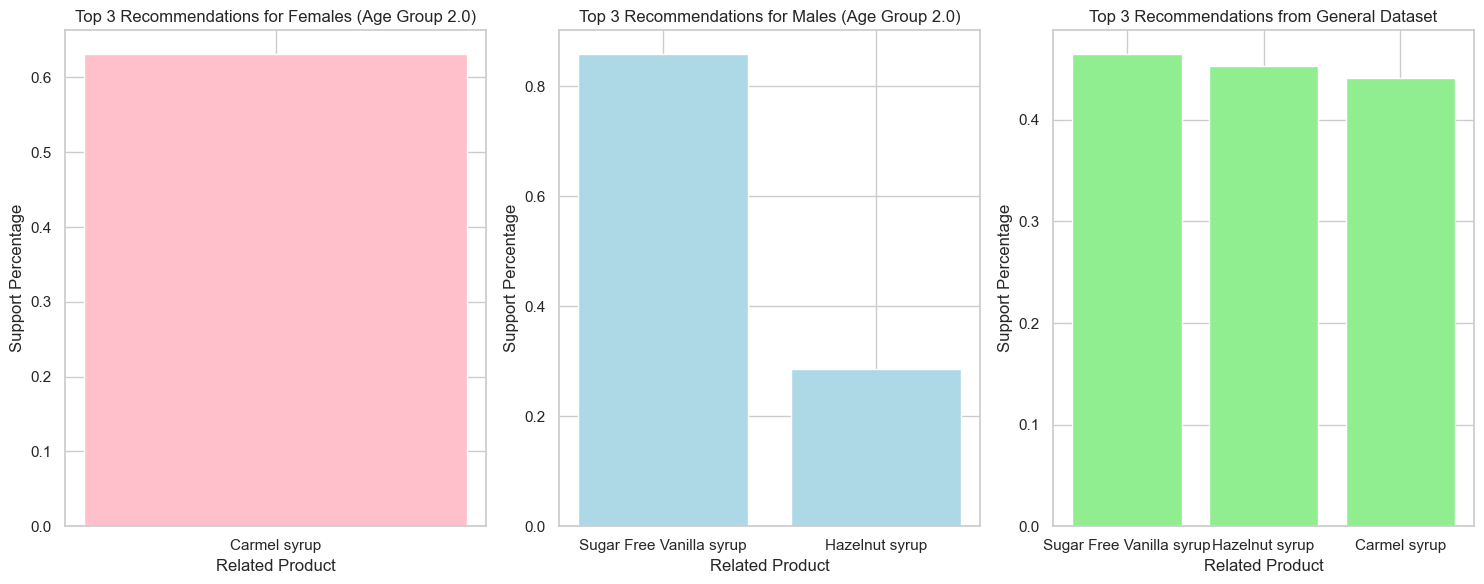

In [165]:
# Age group and product to compare
age_group_to_compare = 2.0
product_to_compare = 'Latte'

# Get top 3 recommendations for females
top_recommendations_female = recomendation_F_gr_df[(recomendation_F_gr_df['Product'] == product_to_compare) & (recomendation_F_gr_df['Age_Group_Number'] == age_group_to_compare)].nlargest(3, 'Support Percentage')

# Get top 3 recommendations for males
top_recommendations_male = recomendation_M_gr_df[
    (recomendation_M_gr_df['Product'] == product_to_compare) & (recomendation_M_gr_df['Age_Group_Number'] == age_group_to_compare)
].nlargest(3, 'Support Percentage')

# Get top 3 recommendations from the general dataset
top_recommendations_general = recomendation_df[
    (recomendation_df['Product'] == product_to_compare)
].nlargest(3, 'Support Percentage')


# Plotting the recommendations
plt.figure(figsize=(15, 6))

# Plot top recommendations for females
plt.subplot(1, 3, 1)
plt.bar(top_recommendations_female['Related Product'], top_recommendations_female['Support Percentage'], color='pink')
plt.title(f"Top 3 Recommendations for Females (Age Group {age_group_to_compare})")
plt.xlabel('Related Product')
plt.ylabel('Support Percentage')

# Plot top recommendations for males
plt.subplot(1, 3, 2)
plt.bar(top_recommendations_male['Related Product'], top_recommendations_male['Support Percentage'], color='lightblue')
plt.title(f"Top 3 Recommendations for Males (Age Group {age_group_to_compare})")
plt.xlabel('Related Product')
plt.ylabel('Support Percentage')

# Plot top recommendations from the general dataset
plt.subplot(1, 3, 3)
plt.bar(top_recommendations_general['Related Product'], top_recommendations_general['Support Percentage'], color='lightgreen')
plt.title(f"Top 3 Recommendations from General Dataset")
plt.xlabel('Related Product')
plt.ylabel('Support Percentage')

plt.tight_layout()
plt.show()

In [166]:
product = 'Latte'

# Select rows from female dataset with specific product
selected_rows_female = recomendation_F_gr_df[recomendation_F_gr_df['Product'] == product]

# Sort the selected rows by age group and then by 'Support Percentage'
selected_rows_female_sorted = selected_rows_female.sort_values(by=['Age_Group_Number', 'Support Percentage'], ascending=[True, False])

# Display the sorted rows
selected_rows_female_sorted.head()

Age_Group_Number Product Related Product  Support Percentage  Confidence
16                 2   Latte    Carmel syrup            0.631313   34.482759
23                 3   Latte  Hazelnut syrup            0.357143   30.769231
31                 4   Latte  Hazelnut syrup            0.919540   33.333333

In [167]:
# Select rows from male dataset with specific product
selected_rows_male = recomendation_M_gr_df[recomendation_M_gr_df['Product'] == product]

# Sort the selected rows by age group and then by 'Support Percentage'
selected_rows_male_sorted = selected_rows_male.sort_values(by=['Age_Group_Number', 'Support Percentage'], ascending=[True, False])

# Display the sorted rows
selected_rows_male_sorted.head()

Age_Group_Number Product           Related Product  Support Percentage  \
2                  1   Latte              Carmel syrup            0.937500   
3                  1   Latte  Sugar Free Vanilla syrup            0.937500   
13                 1   Latte  Sugar Free Vanilla syrup            0.312500   
22                 2   Latte  Sugar Free Vanilla syrup            0.858779   
21                 2   Latte            Hazelnut syrup            0.286260   

    Confidence  
2    46.153846  
3    40.000000  
13  100.000000  
22   45.000000  
21   42.857143

In [168]:
# Select rows from female dataset with specific product
selected_rows = recomendation_df[recomendation_df['Product'] == product]

# Sort the selected rows by age group and then by 'Support Percentage'
selected_rows_sorted = selected_rows.sort_values(by='Support Percentage', ascending= False)

# Display the sorted rows
selected_rows_sorted.head()

Product           Related Product  Support Percentage
9    Latte  Sugar Free Vanilla syrup            0.464839
8    Latte            Hazelnut syrup            0.452920
7    Latte              Carmel syrup            0.441001
11   Latte           Chocolate syrup            0.377433
10   Latte                 Croissant            0.226460